# Predicting Future Housing Prices In Ames, Iowa. #
---

## Purpose of this project: ##

The objective is to predict the future housing prices in Ames, Iowa. The metric for this project uses root mean squared error (RMSE). [Here's][1] the link to the project in Kaggle.

## Summary of results: ##

__The best result after validating a number of models:__

* __Selected model:__ Gradient Boosting Regressor.
* __Selected features:__ 69.
* __Training result:__ RMSE is 22,180.36 USD; standard deviation is 2,309.73 USD. 
* __Testing result from Kaggle:__ RMSE is 28,050.98 USD.  

## Table of content: ##

* Data exploration and analysis:
    * [Explore the datasets, understand each features, and remove ineffective features.](#Explore-the-datasets,-understand-each-features,-and-remove-ineffective-features.)
    * [Break the dataset into 3 sets according to its data type.](#Break-the-dataset-into-3-sets-according-to-its-data-type.)
    * [Count proportion of nulls for each column and remove features with high proportion of nulls.](#Count-proportion-of-nulls-for-each-column-and-remove-features-with-high-proportion-of-nulls.)
    * [Find out the collinearity between each features and the correlation of each feature to 'SalePrice'.](#Find-out-the-collinearity-between-each-features-and-the-correlation-of-each-feature-to-'SalePrice'.)
    * [Find out the variability of each features for numerical, ordinal, and categorical data and remove all features that have very low variability.](#Find-out-the-variability-of-each-features-for-numerical,-ordinal,-and-categorical-data-and-remove-all-features-that-have-very-low-variability.)
* Data cleaning and feature engineering:
    * [Label encode the ordinal data on 'X_train' and 'X_test'.](#Label-encode-the-ordinal-data-on-'X_train'-and-'X_test'.)
    * [Calculate the 'age' of the house with 'Year Remod/Add' and 'Garage Yr Blt'.](#Calculate-the-'age'-of-the-house-with-'Year-Remod/Add'-and-'Garage-Yr-Blt'.)
    * [Work on the missing data.](#Work-on-the-missing-data.)
    * [Label encode the categorical data on 'X_train' and 'X_test' and transform it into dummy variables.](#Label-encode-the-categorical-data-on-'X_train'-and-'X_test'-and-transform-it-into-dummy-variables.)
* Training and evaluating models:
    * [Setting up model training and evaluation framework.](#Setting-up-model-training-and-evaluation-framework.)
    * [Setting up 'KBest' and 'RFECV' model selection framework.](#Setting-up-'KBest'-and-'RFECV'-model-selection-framework.)
    * [Set a scoring benchmark using dummy regressor.](#Set-a-scoring-benchmark-using-dummy-regressor.)
    * [Train and evaluate the Linear Regression model.](#Train-and-evaluate-the-Linear-Regression-model.)
    * [Train and evaluate the Lasso Regression model.](#Train-and-evaluate-the-Lasso-Regression-model.)
    * [Train and evaluate the Ridge Regression model.](#Train-and-evaluate-the-Ridge-Regression-model.)
    * [Train and evaluate the Random Forest Regressor model.](#Train-and-evaluate-the-Random-Forest-Regressor-model.)
    * [Train and evaluate the Gradient Boosting Regressor model.](#Train-and-evaluate-the-Gradient-Boosting-Regressor-model.)
* Making prediction and preparing file for submission.
    * [Select the best model and make prediction on 'X_test'.](#Select-the-best-model-and-make-prediction-on-'X_test'.)
    * [Prepare file for Kaggle submission.](#Prepare-file-for-Kaggle-submission.)
* [Notes for future reference.](#Notes-for-future-reference.)
    
[1]:https://www.kaggle.com/c/dsi-us-6-project-2-regression-challenge/overview

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

pd.set_option("display.max_columns", 100, "display.max_rows", 100)

# Pre-configure the plotting style. 
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12)

sns.set_style('darkgrid')

## Explore the datasets, understand each features, and remove ineffective features. ## 

Return to [Table of content:](#Table-of-content:)

---

[Here's][1] the link to the data dictionary.

[1]: https://www.kaggle.com/c/dsi-us-6-project-2-regression-challenge/data

In [2]:
houses_data = pd.read_csv("csv/train.csv")
y_train = houses_data["SalePrice"]
X_train = houses_data.drop(columns="SalePrice").copy()
X_test = pd.read_csv("csv/test.csv")

X_train.head(10)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD
5,138,535126040,20,RL,137.0,16492,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,PosA,Norm,1Fam,1Story,6,6,1966,2002,Gable,CompShg,BrkFace,Plywood,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,247.0,Rec,713.0,557.0,1517.0,GasA,Ex,Y,SBrkr,1888,0,0,1888,0.0,0.0,2,1,2,1,Gd,6,Mod,1,Gd,Attchd,1966.0,Fin,2.0,578.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD
6,2827,908186070,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SFoyer,6,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,82.0,TA,TA,PConc,Gd,TA,Gd,GLQ,547.0,Unf,0.0,0.0,547.0,GasA,Gd,Y,SBrkr,1072,0,0,1072,1.0,0.0,2,0,2,1,TA,5,Typ,0,NaN,Basment,2005.0,Fin,2.0,525.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,6,2006,New
7,145,535154050,20,RL,NaN,12160,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1959,1959,Hip,CompShg,Plywood,Plywood,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,Rec,1000.0,Unf,0.0,188.0,1188.0,GasA,Fa,Y,SBrkr,1188,0,0,1188,1.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1959.0,RFn,2.0,531.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,5,2010,COD
8,1942,535353130,20,RL,NaN,15783,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,5,5,1952,1952,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,292.0,Unf,0.0,632.0,924.0,GasA,TA,Y,SBrkr,924,0,0,924,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1952.0,Unf,1.0,420.0,TA,TA,Y,0,324,0,0,0,0,NaN,MnPrv,Shed,400,6,2007,WD
9,1956,535426130,60,RL,

__Check the number of rows and columns.__

In [3]:
X_train.shape, X_test.shape

((2051, 80), (879, 80))

__Check whether 'X_train' and 'X_test' have the same features.__

In [4]:
(X_train.columns) == (X_test.columns)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

## Break the dataset into 3 sets according to its data type. ##

Return to [Table of content:](#Table-of-content:)

---

This is to make it easier for me to manage the data, do cleaning and engineer the features later.

In [5]:
X_train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [6]:
numerical_cols = {
    "Lot Frontage", "Lot Area", "Mas Vnr Area", "BsmtFin SF 1", "BsmtFin SF 2", "Total Bsmt SF", 
    "BsmtFin SF 2", "Total Bsmt SF", "1st Flr SF", "2nd Flr SF", "Low Qual Fin SF", "Gr Liv Area", 
    "Bsmt Full Bath", "Bsmt Half Bath", "Full Bath", "Half Bath", "Bedroom AbvGr", "Kitchen AbvGr", 
    "TotRms AbvGrd", "Fireplaces", "Garage Cars", "Garage Area", "Wood Deck SF", "Open Porch SF", 
    "Enclosed Porch", "3Ssn Porch", "Screen Porch", "Misc Val", "Pool Area"
}

ordinal_cols = {
    "Land Contour", "Utilities", "Land Slope", "Overall Qual", "Overall Cond", 
    "Exter Qual", "Exter Cond", "Year Built", "Year Remod/Add", 
    "Bsmt Qual", "Bsmt Cond", "Bsmt Exposure", "BsmtFin Type 1", "BsmtFin Type 2", "Heating QC",
    "Kitchen Qual", "Functional", "Fireplace Qu", "Garage Finish", "Garage Qual", "Garage Cond",
    "Garage Yr Blt", "Pool QC", "Fence"
}

categorical_cols = {
    "PID", "MS Zoning", "MS SubClass", "Street", "Alley", "Condition 1", "Condition 2", 
    "Lot Shape", "Lot Config", "Neighborhood", "Bldg Type", "House Style", "Roof Style", "Roof Matl", 
    "Exterior 1st", "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", 
    "Electrical", "Garage Type", "Paved Drive", "Sale Type", "Misc Feature", "Mo Sold", "Yr Sold"
}

In [7]:
# Create function to remove feature(s) if any, in each set of data type.
def remove_features_in_set(remove_features):
    for feature in remove_features:
        for col in [numerical_cols, ordinal_cols, categorical_cols]:
            if feature in col:
                col.remove(feature)
                print("Removed: {}.".format(feature))

While exploring each feature, I also record it in an Excel file. This allows me to keep track of what has been done to a particular feature after removing, cleaning, engineering.  

__After exploring the datasets, removes features that are:__

* __Leaking data:__
    * This feature `Yr Sold` reveals the future data. House price is settled on the year you sold the house. You can change the price by dropping or raising the price depending on the demand, but that can only be done in the future.
* __Insignificant:__ 
    * Remove `Mo Sold`, because knowing which month it is sold doesn't really add any value to the house price.
    * `PID`. It is just an ID. It doesn't add value to the house price.
* __Conceptually related:__
    * `Year Remod/Add` is the same as `Year Built` if no remodeling or additions. I will use the latest year from `Year Remod/Add` instead.  

In [8]:
remove_features = [
    "PID", "Year Built", "Mo Sold", "Yr Sold"
]

X_train.drop(columns=remove_features, inplace=True)
X_test.drop(columns=remove_features, inplace=True)

remove_features_in_set(remove_features)

Removed: PID.
Removed: Year Built.
Removed: Mo Sold.
Removed: Yr Sold.


## Count proportion of nulls for each column and remove features with high proportion of nulls. ## 

Return to [Table of content:](#Table-of-content:)

In [9]:
def null_heatmap(df=None, calculate='proportion', display='both', figsize=(10,10)):
    # Create a boolean dataframe based on whether values are null.
    df_null = df.isnull()

    # Create a heatmap of the boolean dataframe.
    # If the color is not dark, it means null.
    if display == 'both' or display == 'plot':

        # Set up the matplotlib figure.
        fig = plt.figure(figsize=figsize)
        ax = fig.gca()

        print("Warning: The white part may not be visible on the plot when applying it on very large datasets with very few null rows.")
        sns.heatmap(df_null, cbar=False, yticklabels=False)
        plt.xticks(rotation=90, fontsize=14)
        plt.show()
    
    if display == 'both' or display == 'series':
        if calculate == 'proportion':
            nulls = round(df_null.sum() / df.shape[0] * 100, 2)
        elif calculate == 'sum':
            nulls = df_null.sum()
        return nulls
    

nulls_proportion = null_heatmap(df=houses_data, display='series')

# Show the columns that contain nulls.
nulls_proportion[nulls_proportion > 0]

Lot Frontage      16.09
Alley             93.17
Mas Vnr Type       1.07
Mas Vnr Area       1.07
Bsmt Qual          2.68
Bsmt Cond          2.68
Bsmt Exposure      2.83
BsmtFin Type 1     2.68
BsmtFin SF 1       0.05
BsmtFin Type 2     2.73
BsmtFin SF 2       0.05
Bsmt Unf SF        0.05
Total Bsmt SF      0.05
Bsmt Full Bath     0.10
Bsmt Half Bath     0.10
Fireplace Qu      48.76
Garage Type        5.51
Garage Yr Blt      5.56
Garage Finish      5.56
Garage Cars        0.05
Garage Area        0.05
Garage Qual        5.56
Garage Cond        5.56
Pool QC           99.56
Fence             80.50
Misc Feature      96.83
dtype: float64

---
__Remove features that have:__

* __Nulls above 80%:__
    * There isn't a way to impute accurate values for `Alley` feature. Even if there is an appropriate correlated feature I can use to impute a value, 80% or above of the rows will be filled with inaccurate value also because it depends on how well the Y is explained by the X based on the r squared value. 
    * The reason `Pool QC` has null value is because there isn't any pool installed in the house. Since `Pool QC` is removed due to large proportion of nulls and very low variability, I remove `Pool Area` as well because both features are conceptually related. 
    * `Pool QC`, `Fence`, and `Misc Feature` is removed due to large proportion of nulls and very low variability.

In [10]:
remove_features = [
    'Alley', 'Pool QC', 'Pool Area', 'Fence', 'Misc Feature'
]

X_train.drop(columns=remove_features, inplace=True)
X_test.drop(columns=remove_features, inplace=True)

remove_features_in_set(remove_features)

Removed: Alley.
Removed: Pool QC.
Removed: Pool Area.
Removed: Fence.
Removed: Misc Feature.


## Find out the collinearity between each features and the correlation of each feature to 'SalePrice'. ##

Return to [Table of content:](#Table-of-content:)

In [11]:
def corr_heatmap(df=None, scatter=False, absolute=False, r_squared=False, 
                 cmap='RdBu', display=[-0.1, 0.1], figsize=(10,10)):
    # See the pre-defined styles provided.
    plt.style.available
    plt.style.use('seaborn-colorblind')

    if scatter:
        scatter_matrix(df.iloc[:20,:20], figsize=figsize, hist_kwds={'bins':10})

    elif not scatter:
        # Set up the matplotlib figure.
        fig = plt.figure(figsize=figsize)
        ax = fig.gca()
        
        # Compute the correlation matrix.
        corr = df.corr()
        if absolute:
            corr = corr.abs()
        
        if r_squared:
            corr = corr ** 2

        # Generate a mask for the upper triangle.
        mask = np.zeros_like(corr, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

        # If 'colormap' is not given a parameter, generate a custom diverging colormap.
        if cmap is None:
            cmap = sns.diverging_palette(220, 10, as_cmap=True)

        # Draw the heatmap with the mask and correct aspect ratio.
        sns.heatmap(
            corr, ax=ax, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            annot=True, center=0, square=True, linewidths=.5, 
            cbar_kws={"shrink": .5}
        )
        sns.set(style="white")
        
        # Format the text in the plot to make it easier to read.
        for text in ax.texts:
            t = float(text.get_text())
            if display[0] < t < display[1]:
                text.set_text('')
            else:
                text.set_text(round(t, 2))
            text.set_fontsize(12)
        plt.xticks(rotation=90, size=12)
        plt.yticks(rotation=0, size=12)    
    plt.show()

__Explore the R-squared value between each features for numerical and ordinal data types.__

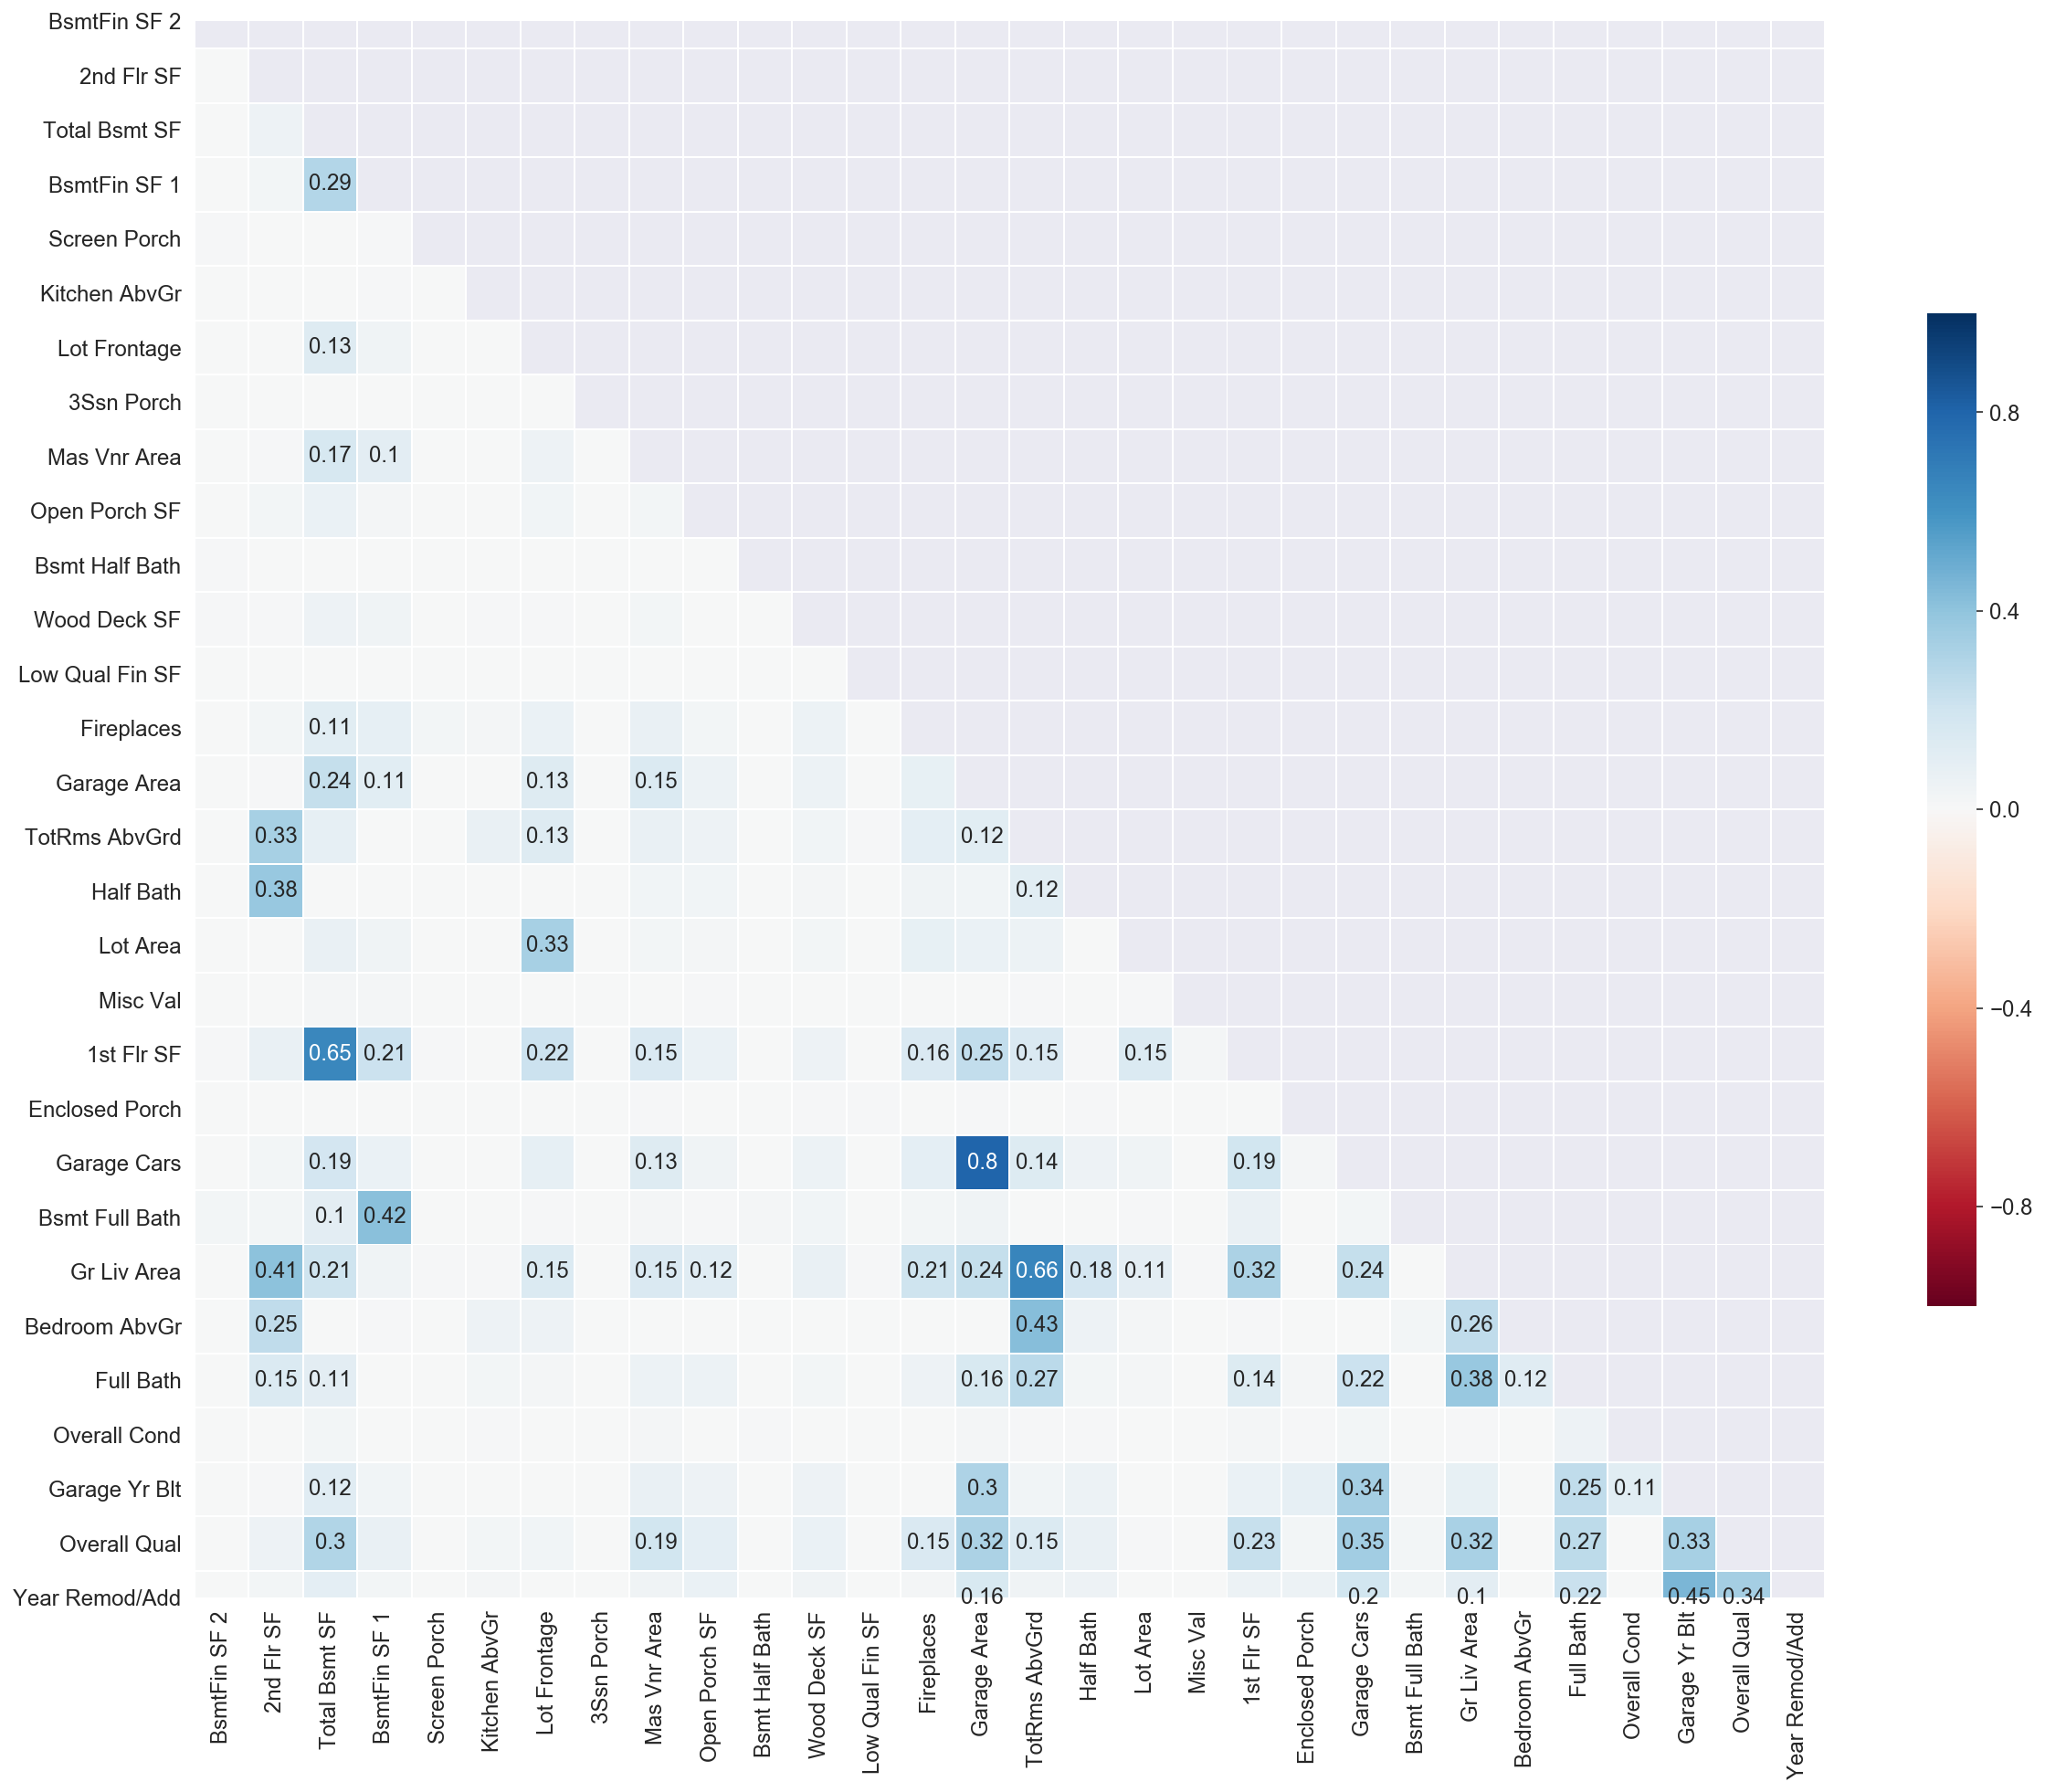

In [12]:
corr_heatmap(df=houses_data[list(numerical_cols) + list(ordinal_cols)], 
             r_squared=True, figsize=(20,20))

---
__Findings from the R-squared heatmap:__

* `Garage Car` and `Garage Area` have 80% R-squared. Perhaps I can explore removing either one of the feature to prevent overfitting due to collinearity issue, but it probably doesn't make much difference because I can apply regularisation for the regression model later. 

__Find the features that are correlated to `SalePrice`.__

In [13]:
numerical_cols.add("SalePrice")
features_corr_SalePrice = houses_data[list(numerical_cols) + list(ordinal_cols)].corr()["SalePrice"]
numerical_cols.remove("SalePrice")

# Extract features that have correlation above 60%. 
features_corr_SalePrice_cols = features_corr_SalePrice[features_corr_SalePrice >= .6].index
features_corr_SalePrice[features_corr_SalePrice >= .6]

SalePrice        1.000000
Total Bsmt SF    0.628925
Garage Area      0.650270
1st Flr SF       0.618486
Garage Cars      0.648220
Gr Liv Area      0.697038
Overall Qual     0.800207
Name: SalePrice, dtype: float64

---
__Visualise the correlation in scatter plots.__

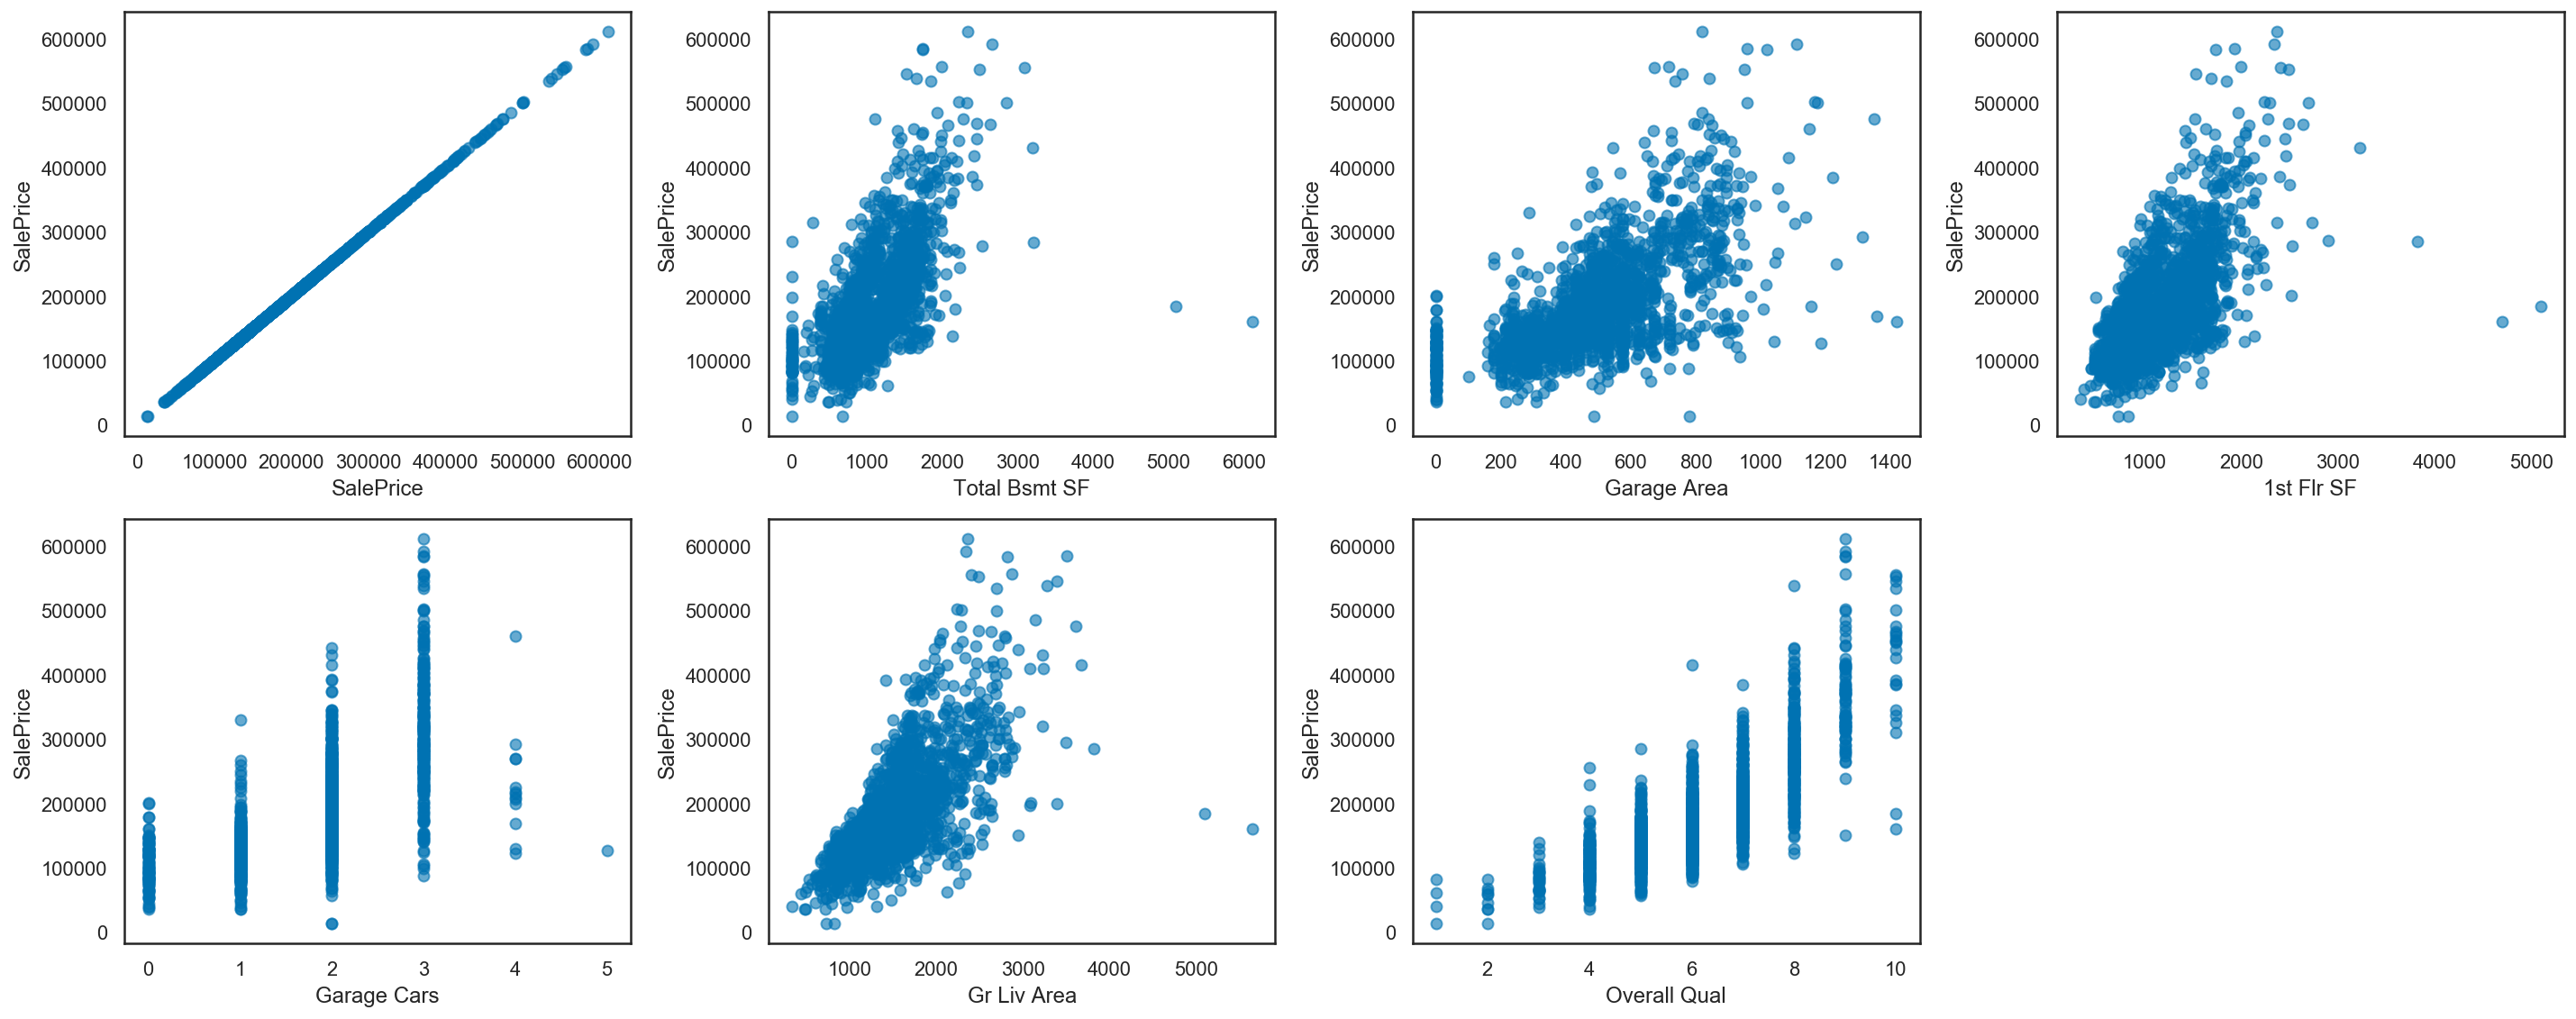

In [14]:
def corr_plot(target='A', df=None, cols=[], pairplot=True, figsize=(20,4)):
    # See the pre-defined styles provided.
    plt.style.available
    plt.style.use('seaborn-colorblind')

    if pairplot:
        sns.pairplot(
            df, x_vars=cols, y_vars=target, 
            height=5, aspect=0.9, kind='reg')

    else:
        # Multi axes plotting.
        # One Y variable against all X variables.
        fig = plt.figure(figsize=figsize)
        
        for i, col in enumerate(cols):
            fig.add_subplot(figsize[1] / 4, 4, 1+i)
            
            plt.scatter(df[col], df[target], alpha=.6)
            plt.ylabel(target)
            plt.xlabel(col)
        
        fig.tight_layout()
        plt.show()
        
length = len(features_corr_SalePrice_cols)
corr_plot(target="SalePrice", df=houses_data[features_corr_SalePrice_cols], pairplot=False,
          cols=features_corr_SalePrice_cols, figsize=(20, 4 * np.ceil(length / 5)) )

## Find out the variability of each features for numerical, ordinal, and categorical data and remove all features that have very low variability. ##

Return to [Table of content:](#Table-of-content:)

---

__Find the standard deviation of each numerical data feature and sort them.__

In [15]:
np.ceil(houses_data[numerical_cols].std(skipna=True)).sort_values(ascending=False)

Lot Area           6743.0
Misc Val            574.0
Gr Liv Area         501.0
BsmtFin SF 1        462.0
Total Bsmt SF       450.0
2nd Flr SF          426.0
1st Flr SF          397.0
Garage Area         216.0
Mas Vnr Area        175.0
BsmtFin SF 2        166.0
Wood Deck SF        129.0
Open Porch SF        67.0
Enclosed Porch       60.0
Screen Porch         58.0
Low Qual Fin SF      52.0
3Ssn Porch           26.0
Lot Frontage         24.0
TotRms AbvGrd         2.0
Bsmt Half Bath        1.0
Bedroom AbvGr         1.0
Fireplaces            1.0
Kitchen AbvGr         1.0
Half Bath             1.0
Garage Cars           1.0
Bsmt Full Bath        1.0
Full Bath             1.0
dtype: float64

---
__Visualise the variability in histogram plots for the numerical data.__

/Users/lioneltay/Applications/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/lioneltay/Applications/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


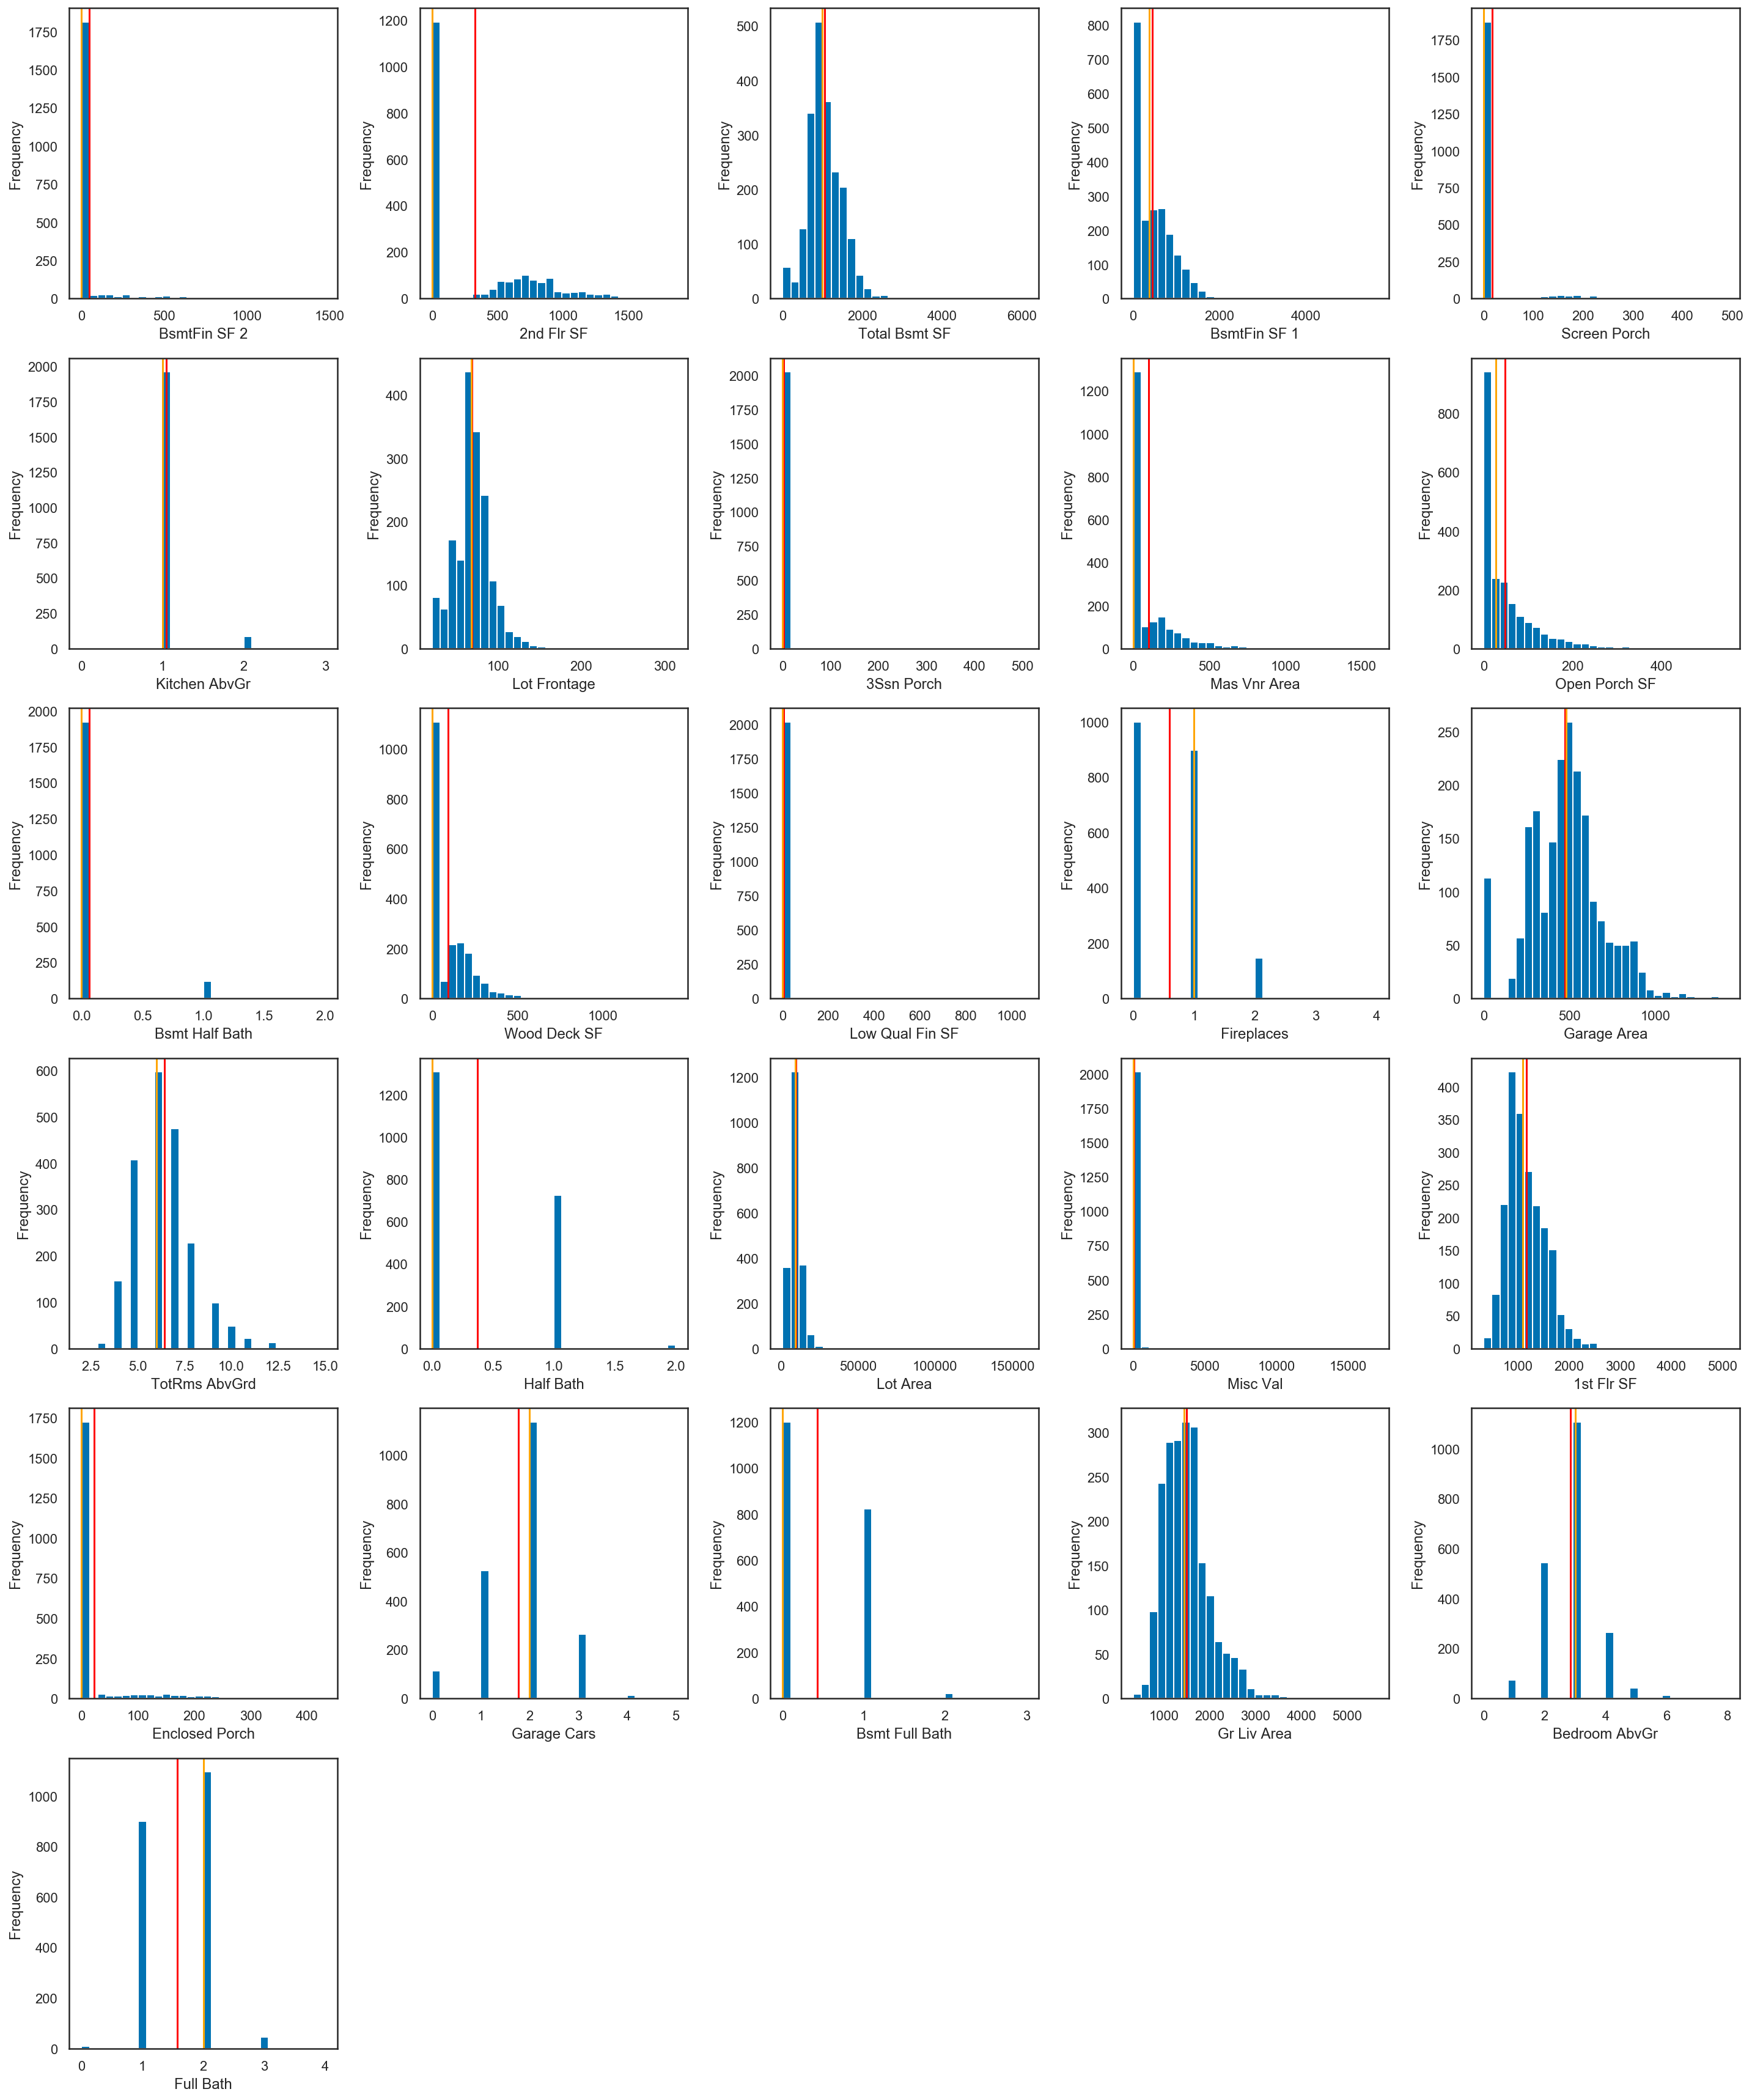

In [16]:
def dist_plot(df=None, cols=[], bins=30, figsize=(20,4)):
    # See the pre-defined styles provided.
    plt.style.available
    plt.style.use('seaborn-colorblind')

    # Multi axes plotting.
    # One Y variable against all X variables.
    fig = plt.figure(figsize=figsize)
    
    for i, col in enumerate(cols):
        fig.add_subplot(figsize[1] / 4, 5, 1+i)
        plt.ylabel('Frequency')
        plt.xlabel(col)
        
        # df[col].plot(kind='kde')
        plt.hist(df[col], bins=bins)
        plt.axvline(df[col].mean(), c='red')
        plt.axvline(df[col].median(), c='orange')

    fig.tight_layout()
    plt.show()
        
    if len(cols) == 1:
        print(
            'Max: {}\nMin: {}\n\nMean: {}\nVar.: {}\nStd.: {}\n\nMedian: {}\nQuantiles: \n{}'.format(
                df[cols].max(), df[cols].min(), df[cols].mean(), df[cols].var(), df[cols].std(), df[cols].median(),
                df[cols].quantile(q=[.25, .5, .75], interpolation='linear')
                )
        )
        
length = len(numerical_cols)
dist_plot(df=houses_data[numerical_cols], cols=list(numerical_cols), 
          figsize=(20, 4 * np.ceil(length / 5)) )

---
__Remove numerical features that have:__

* __Very low variability:__
    * `BsmtFin SF 2`, `Low Qual Fin SF`, `Bsmt Half Bath`, `Kitchen AbvGr`, `Enclosed Porch`, `3Ssn Porch`, `Screen Porch`, `Misc Val`.

In [17]:
remove_features = [
    'BsmtFin SF 2', 'Low Qual Fin SF', 'Bsmt Half Bath', 'Kitchen AbvGr', 
    'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Misc Val', 
]

X_train.drop(columns=remove_features, inplace=True)
X_test.drop(columns=remove_features, inplace=True)

remove_features_in_set(remove_features)

Removed: BsmtFin SF 2.
Removed: Low Qual Fin SF.
Removed: Bsmt Half Bath.
Removed: Kitchen AbvGr.
Removed: Enclosed Porch.
Removed: 3Ssn Porch.
Removed: Screen Porch.
Removed: Misc Val.


---
__Visualise the variability in bar plots for the ordinal data.__

In [18]:
def cat_plot(df=None, cols=[], normalize=False, figsize=(20,4)):
    # See the pre-defined styles provided.
    plt.style.available
    plt.style.use('seaborn-colorblind')

    # Multi axes plotting.
    # One Y variable against all X variables.
    fig = plt.figure(figsize=figsize)
    
    for i, col in enumerate(cols):
        fig.add_subplot(figsize[1] / 4, 5, 1+i)
        plt.xlabel(col)
        
        counts = df[col].value_counts(normalize=normalize)
        counts.plot(kind='bar', rot=0)
        
    fig.tight_layout()
    plt.show()

    if len(cols) == 1:
        var = 0
        for element in counts.index:
            var += counts[element] * (counts.sum() - counts[element])
        var /= counts.sum()

        print(
            'Var.: {}\nMode: \n{}\n\nProportion: \n{}'.format(
                var, counts.sort_values(ascending=False), round(df[col].value_counts(normalize=True) * 100, 2)
                )
        )
    fig.tight_layout()

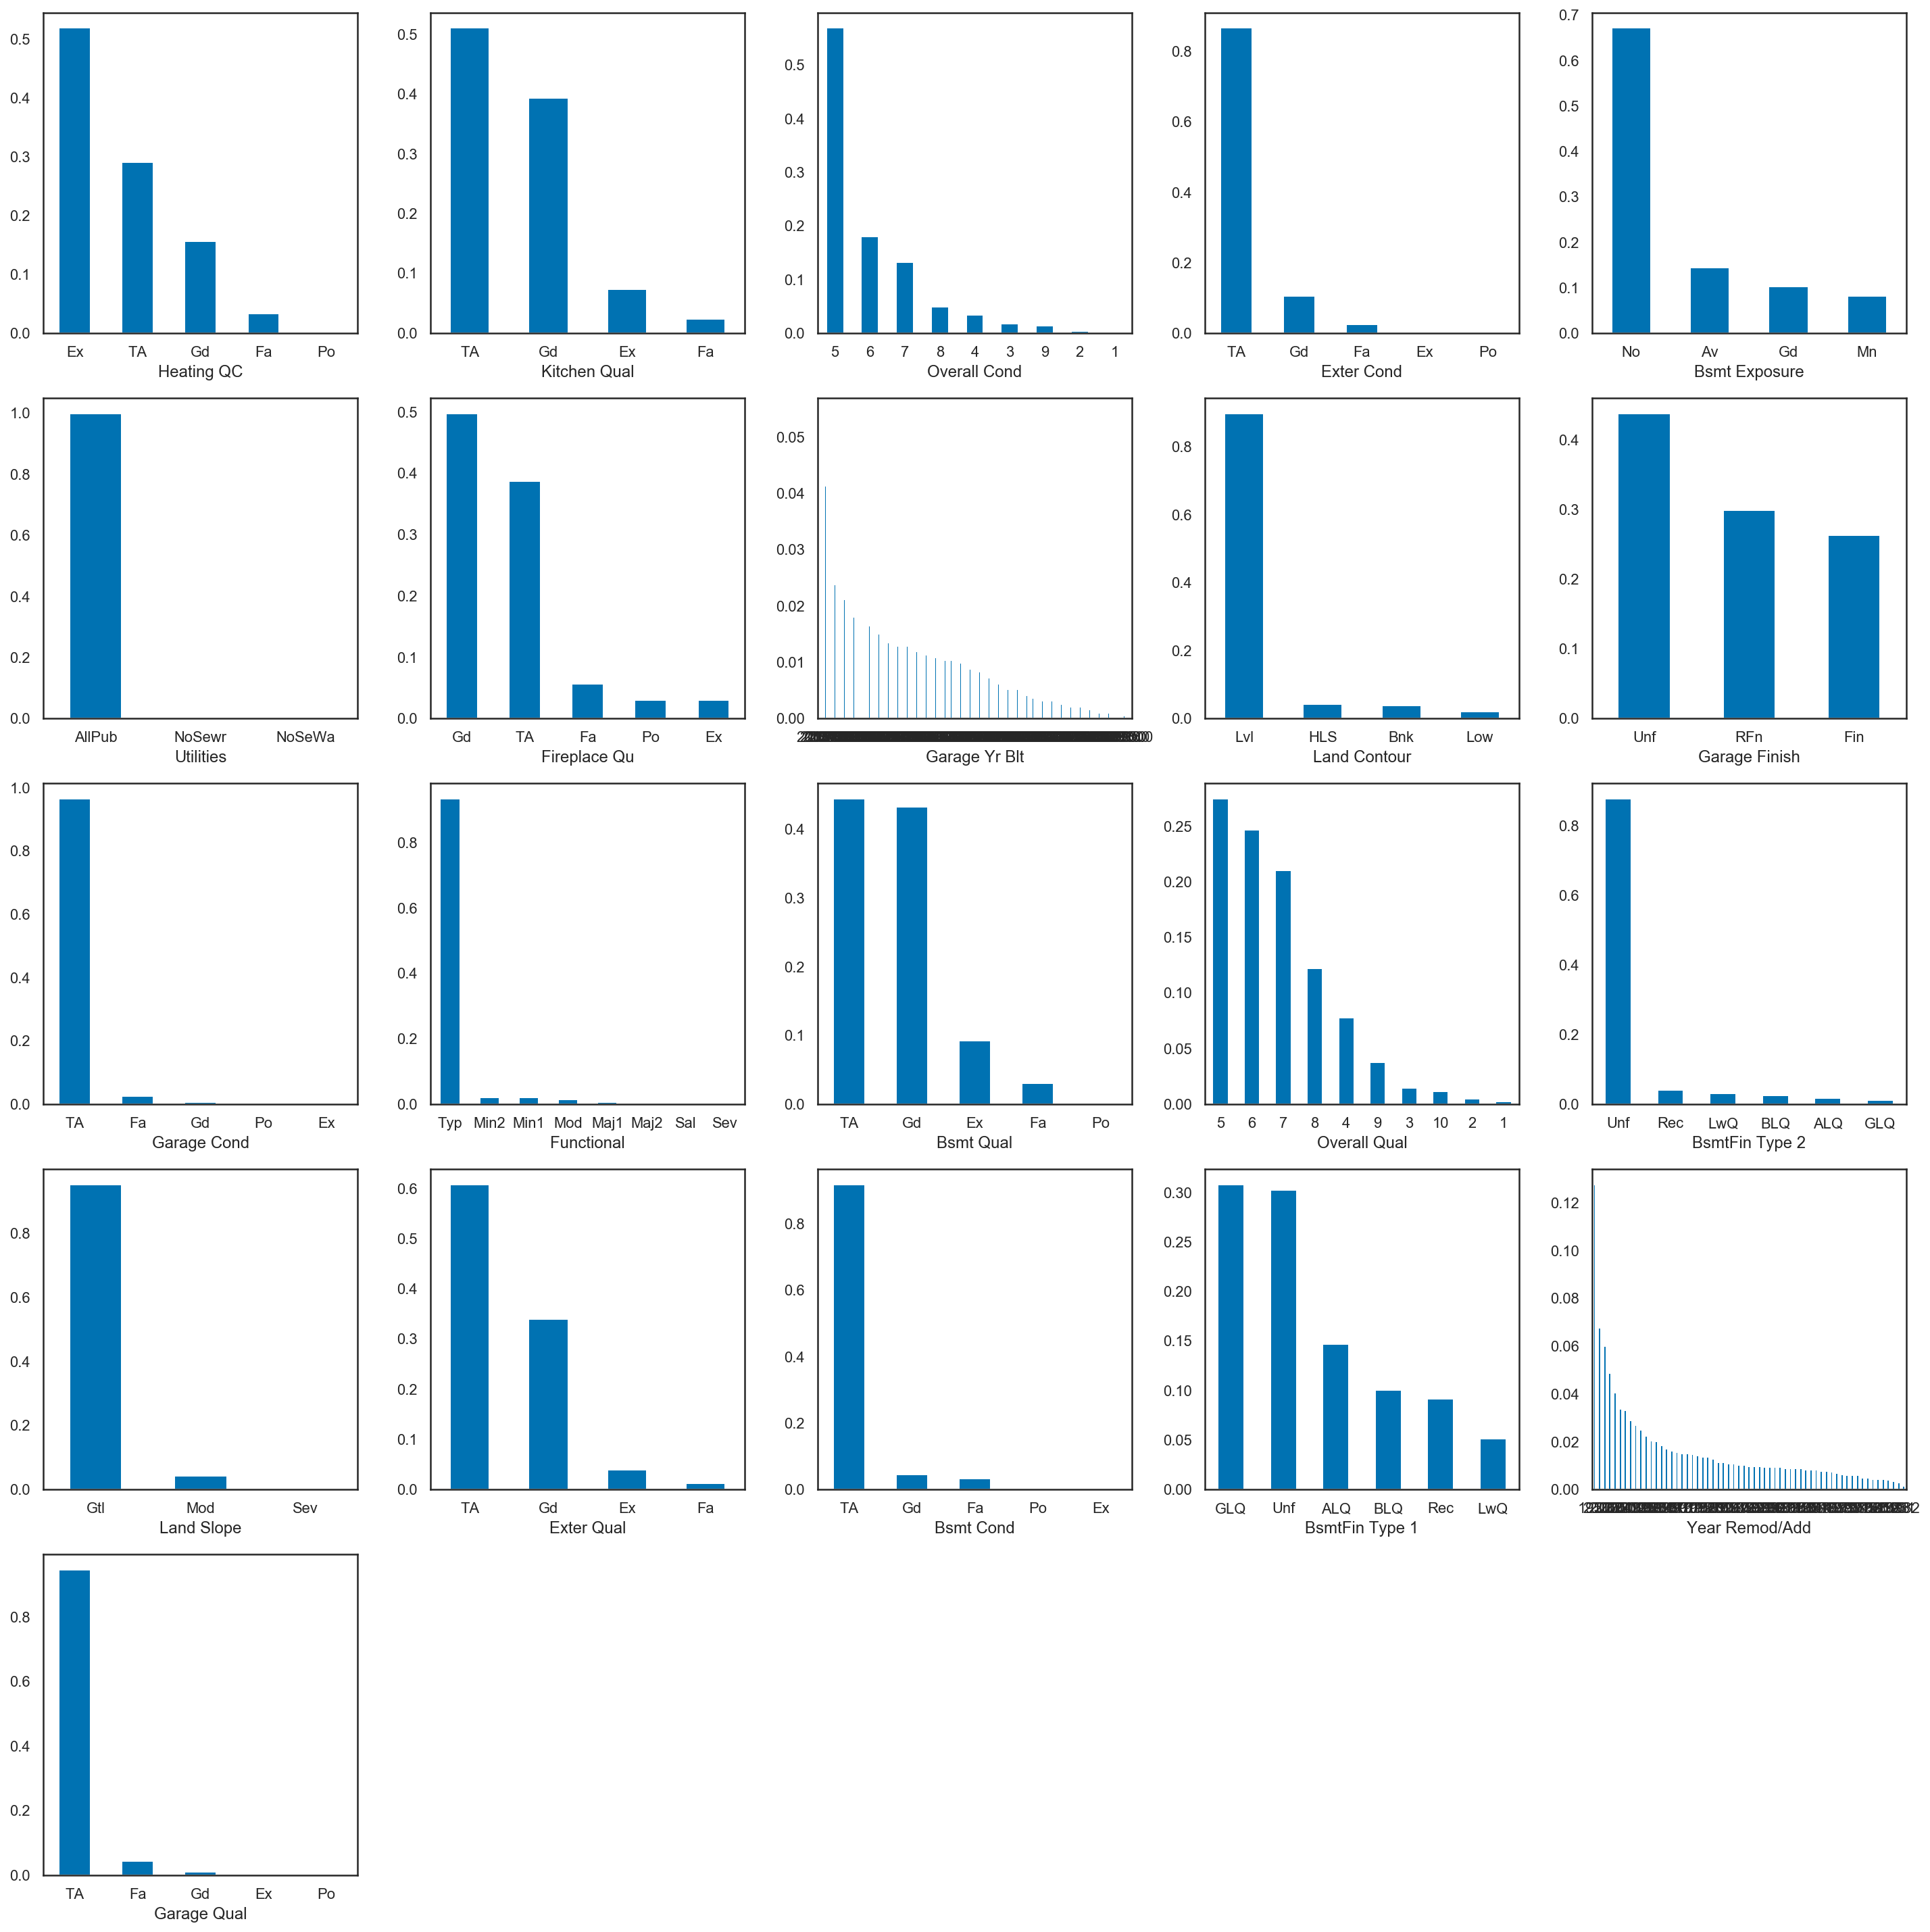

In [19]:
length = len(ordinal_cols)
cat_plot(df=houses_data[ordinal_cols], cols=list(ordinal_cols), 
         normalize=True, figsize=(20, 4 * np.ceil(length / 5)) )

---
__Remove ordinal features that have:__

* __Very low variability:__
    * `Street`, `Root Matl`, `Heating`.

In [20]:
remove_features = [
    'Land Slope', 'Utilities', 'Garage Cond', 'Functional'
]

X_train.drop(columns=remove_features, inplace=True)
X_test.drop(columns=remove_features, inplace=True)

remove_features_in_set(remove_features)

Removed: Land Slope.
Removed: Utilities.
Removed: Garage Cond.
Removed: Functional.


---
__Visualise the variability in bar plots for the categorical data.__

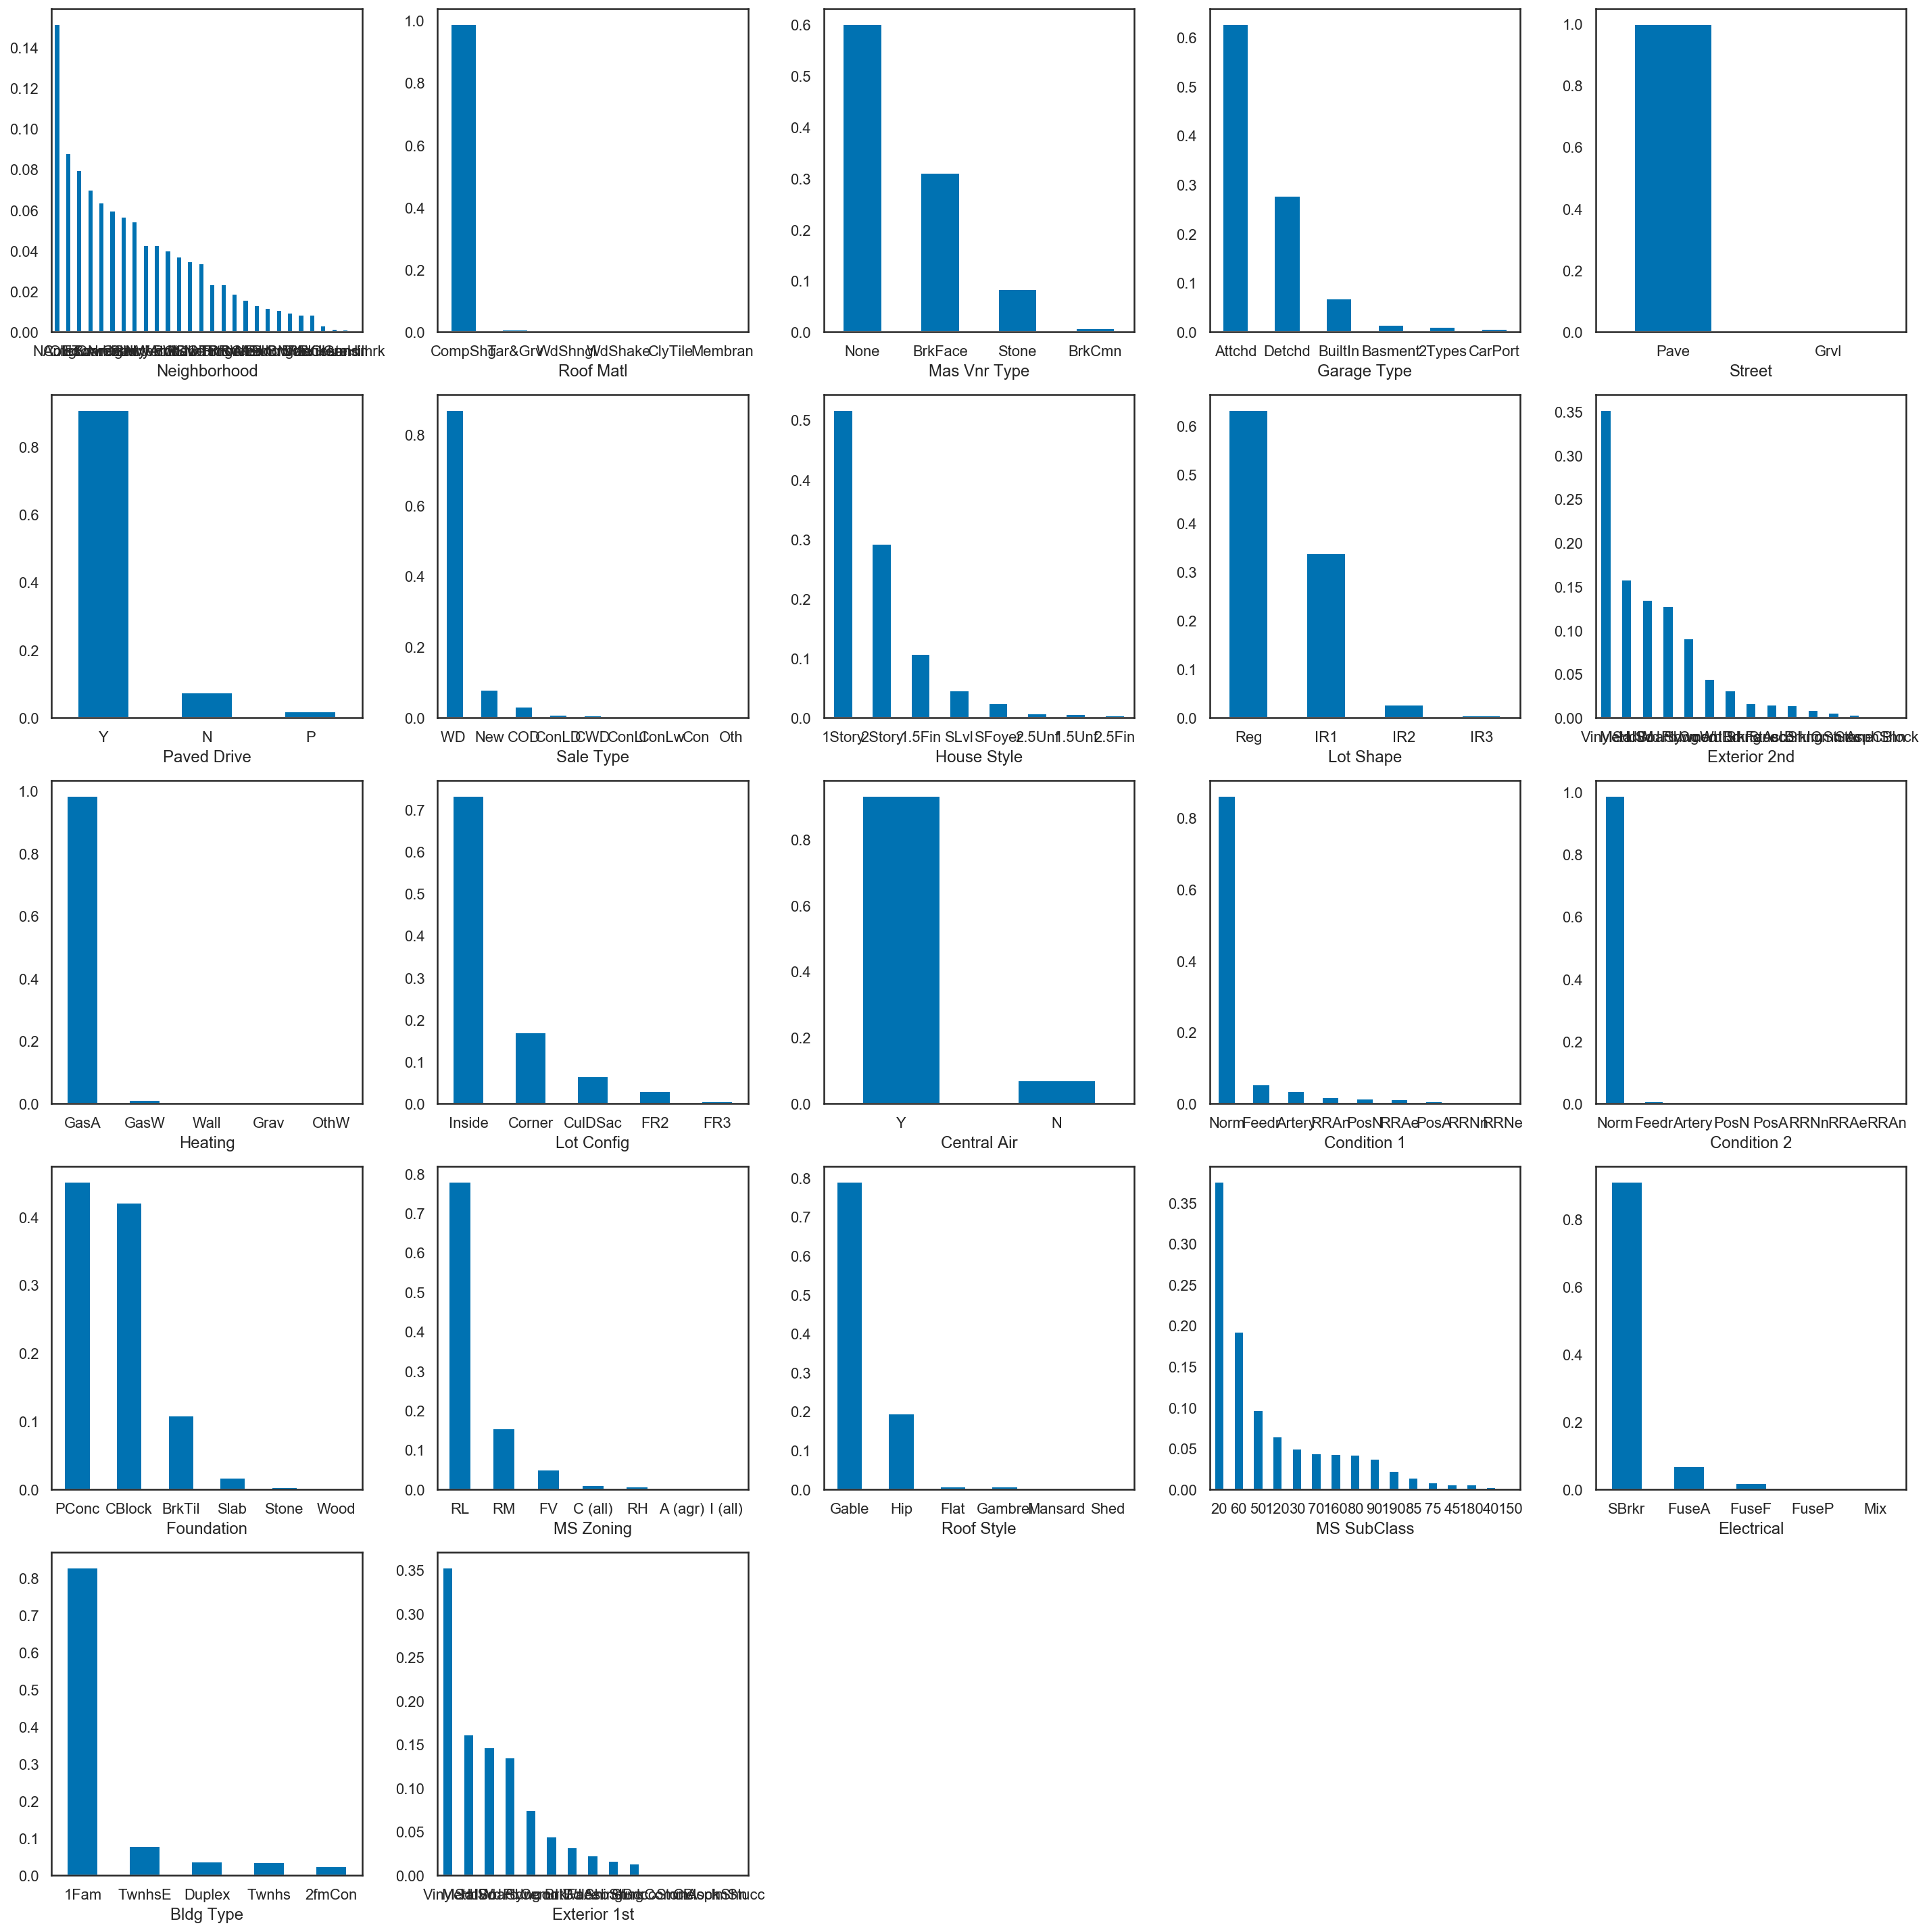

In [21]:
length = len(categorical_cols)
cat_plot(df=houses_data[categorical_cols], cols=list(categorical_cols), 
         normalize=True, figsize=(20, 4 * np.ceil(length / 5)) )

---
__Remove categorical features that have:__

* __Very low variability:__
    * `Street`, `Root Matl`, `Heating`.

In [22]:
remove_features = [
    'Condition 2', 'Street', 'Roof Matl', 'Heating'
]

X_train.drop(columns=remove_features, inplace=True)
X_test.drop(columns=remove_features, inplace=True)

remove_features_in_set(remove_features)

Removed: Condition 2.
Removed: Street.
Removed: Roof Matl.
Removed: Heating.


## Label encode the ordinal data on 'X_train' and 'X_test'. ##

Return to [Table of content:](#Table-of-content:)

---

__Display a list of ordinal and categorical features and its dtype.__

In [23]:
X_train[list(ordinal_cols) + list(categorical_cols)].dtypes

Heating QC         object
Kitchen Qual       object
Overall Cond        int64
Exter Cond         object
Bsmt Exposure      object
Fireplace Qu       object
Garage Yr Blt     float64
Land Contour       object
Garage Finish      object
Bsmt Qual          object
Overall Qual        int64
BsmtFin Type 2     object
Exter Qual         object
Bsmt Cond          object
BsmtFin Type 1     object
Year Remod/Add      int64
Garage Qual        object
Neighborhood       object
Mas Vnr Type       object
Garage Type        object
Paved Drive        object
Sale Type          object
House Style        object
Lot Shape          object
Exterior 2nd       object
Lot Config         object
Central Air        object
Condition 1        object
Foundation         object
MS Zoning          object
Roof Style         object
MS SubClass         int64
Electrical         object
Bldg Type          object
Exterior 1st       object
dtype: object

__Make a duplicate of the `X_train` and `X_test`.__ In case of mistake, I can use the orignals to overwrite the duplicates without rerunning the entire notebook.

In [24]:
X_train_dup = X_train.copy()
X_test_dup = X_test.copy()

X_train_dup[ordinal_cols].head()

,Heating QC,Kitchen Qual,Overall Cond,Exter Cond,Bsmt Exposure,Fireplace Qu,Garage Yr Blt,Land Contour,Garage Finish,Bsmt Qual,Overall Qual,BsmtFin Type 2,Exter Qual,Bsmt Cond,BsmtFin Type 1,Year Remod/Add,Garage Qual
0,Ex,Gd,8,TA,No,NaN,1976.0,Lvl,RFn,TA,6,Unf,Gd,TA,GLQ,2005,TA
1,Ex,Gd,5,TA,No,TA,1997.0,Lvl,RFn,Gd,7,Unf,Gd,TA,GLQ,1997,TA
2,TA,Gd,7,Gd,No,NaN,1953.0,Lvl,Unf,TA,5,Unf,TA,TA,GLQ,2007,TA
3,Gd,TA,5,TA,No,NaN,2007.0,Lvl,Fin,Gd,5,Unf,TA,TA,Unf,2007,TA
4,TA,TA,8,TA,No,NaN,1957.0,Lvl,Unf,Fa,6,Unf,TA,Gd,Unf,1993,TA


__Transform the ordinal features' values to ordered numerical values.__

In [25]:
# List the order.
quality_ord = ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
fin_ord = ['None', 'Unf', 'RFn', 'Fin']
bsmt_fin_ord = ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
bsmt_exposure_ord = ['None', 'No', 'Mn', 'Av', 'Gd']
land_contour_ord = ['Low', 'HLS', 'Bnk', 'Lvl']
 
def ordered_label_encoder(df, cols, order):
    for col in cols:
        df[col] = pd.Categorical(df[col], categories=order, ordered=True)
        df[col] = df[col].cat.codes

In [26]:
X_train_dup[ordinal_cols].columns

Index(['Heating QC', 'Kitchen Qual', 'Overall Cond', 'Exter Cond',
       'Bsmt Exposure', 'Fireplace Qu', 'Garage Yr Blt', 'Land Contour',
       'Garage Finish', 'Bsmt Qual', 'Overall Qual', 'BsmtFin Type 2',
       'Exter Qual', 'Bsmt Cond', 'BsmtFin Type 1', 'Year Remod/Add',
       'Garage Qual'],
      dtype='object')

In [27]:
null_heatmap(df=X_train_dup[ordinal_cols], display='series')

Heating QC         0.00
Kitchen Qual       0.00
Overall Cond       0.00
Exter Cond         0.00
Bsmt Exposure      2.83
Fireplace Qu      48.76
Garage Yr Blt      5.56
Land Contour       0.00
Garage Finish      5.56
Bsmt Qual          2.68
Overall Qual       0.00
BsmtFin Type 2     2.73
Exter Qual         0.00
Bsmt Cond          2.68
BsmtFin Type 1     2.68
Year Remod/Add     0.00
Garage Qual        5.56
dtype: float64

---
__Findings after rereading the data dictionary:__

`Fireplace Qu`, `Bsmt Cond`, `Bsmt Qual`, `Bsmt Exposure`, `BsmtFin Type 1`, `BsmtFin Type 2`, `Garage Qual`, `Garage Finish` features have null values. This is because the house doesn't have either fireplace, basement, or garage.

I will fill these features with 'None'. 

In [28]:
cols = [
    'Fireplace Qu', 'Bsmt Cond', 'Bsmt Qual', 'Garage Qual', 'Garage Finish', 
    'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2'
]

for col in cols:
    X_train_dup[col].fillna(value='None', inplace=True)

In [29]:
cols = [
    'Fireplace Qu', 'Bsmt Cond', 'Kitchen Qual', 
    'Bsmt Qual', 'Exter Cond', 'Exter Qual', 'Garage Qual', 'Heating QC' 
]

ordered_label_encoder(X_train_dup, cols, quality_ord)
ordered_label_encoder(X_test_dup, cols, quality_ord)

X_train_dup[ordinal_cols].head()

,Heating QC,Kitchen Qual,Overall Cond,Exter Cond,Bsmt Exposure,Fireplace Qu,Garage Yr Blt,Land Contour,Garage Finish,Bsmt Qual,Overall Qual,BsmtFin Type 2,Exter Qual,Bsmt Cond,BsmtFin Type 1,Year Remod/Add,Garage Qual
0,5,4,8,3,No,0,1976.0,Lvl,RFn,3,6,Unf,4,3,GLQ,2005,3
1,5,4,5,3,No,3,1997.0,Lvl,RFn,4,7,Unf,4,3,GLQ,1997,3
2,3,4,7,4,No,0,1953.0,Lvl,Unf,3,5,Unf,3,3,GLQ,2007,3
3,4,3,5,3,No,0,2007.0,Lvl,Fin,4,5,Unf,3,3,Unf,2007,3
4,3,3,8,3,No,0,1957.0,Lvl,Unf,2,6,Unf,3,4,Unf,1993,3


In [30]:
cols = [
    'BsmtFin Type 2', 'BsmtFin Type 1'
]

ordered_label_encoder(X_train_dup, cols, bsmt_fin_ord)
ordered_label_encoder(X_test_dup, cols, bsmt_fin_ord)

X_train_dup[ordinal_cols].head()

,Heating QC,Kitchen Qual,Overall Cond,Exter Cond,Bsmt Exposure,Fireplace Qu,Garage Yr Blt,Land Contour,Garage Finish,Bsmt Qual,Overall Qual,BsmtFin Type 2,Exter Qual,Bsmt Cond,BsmtFin Type 1,Year Remod/Add,Garage Qual
0,5,4,8,3,No,0,1976.0,Lvl,RFn,3,6,1,4,3,6,2005,3
1,5,4,5,3,No,3,1997.0,Lvl,RFn,4,7,1,4,3,6,1997,3
2,3,4,7,4,No,0,1953.0,Lvl,Unf,3,5,1,3,3,6,2007,3
3,4,3,5,3,No,0,2007.0,Lvl,Fin,4,5,1,3,3,1,2007,3
4,3,3,8,3,No,0,1957.0,Lvl,Unf,2,6,1,3,4,1,1993,3


In [31]:
cols = [
    'Garage Finish'
]

ordered_label_encoder(X_train_dup, cols, fin_ord)
ordered_label_encoder(X_test_dup, cols, fin_ord)

X_train_dup[ordinal_cols].head()

,Heating QC,Kitchen Qual,Overall Cond,Exter Cond,Bsmt Exposure,Fireplace Qu,Garage Yr Blt,Land Contour,Garage Finish,Bsmt Qual,Overall Qual,BsmtFin Type 2,Exter Qual,Bsmt Cond,BsmtFin Type 1,Year Remod/Add,Garage Qual
0,5,4,8,3,No,0,1976.0,Lvl,2,3,6,1,4,3,6,2005,3
1,5,4,5,3,No,3,1997.0,Lvl,2,4,7,1,4,3,6,1997,3
2,3,4,7,4,No,0,1953.0,Lvl,1,3,5,1,3,3,6,2007,3
3,4,3,5,3,No,0,2007.0,Lvl,3,4,5,1,3,3,1,2007,3
4,3,3,8,3,No,0,1957.0,Lvl,1,2,6,1,3,4,1,1993,3


In [32]:
cols = [
    'Bsmt Exposure'
]

ordered_label_encoder(X_train_dup, cols, bsmt_exposure_ord)
ordered_label_encoder(X_test_dup, cols, bsmt_exposure_ord)

X_train_dup[ordinal_cols].head()

,Heating QC,Kitchen Qual,Overall Cond,Exter Cond,Bsmt Exposure,Fireplace Qu,Garage Yr Blt,Land Contour,Garage Finish,Bsmt Qual,Overall Qual,BsmtFin Type 2,Exter Qual,Bsmt Cond,BsmtFin Type 1,Year Remod/Add,Garage Qual
0,5,4,8,3,1,0,1976.0,Lvl,2,3,6,1,4,3,6,2005,3
1,5,4,5,3,1,3,1997.0,Lvl,2,4,7,1,4,3,6,1997,3
2,3,4,7,4,1,0,1953.0,Lvl,1,3,5,1,3,3,6,2007,3
3,4,3,5,3,1,0,2007.0,Lvl,3,4,5,1,3,3,1,2007,3
4,3,3,8,3,1,0,1957.0,Lvl,1,2,6,1,3,4,1,1993,3


In [33]:
cols = [
    'Land Contour'
]

ordered_label_encoder(X_train_dup, cols, land_contour_ord)
ordered_label_encoder(X_test_dup, cols, land_contour_ord)

X_train_dup[ordinal_cols].head()

,Heating QC,Kitchen Qual,Overall Cond,Exter Cond,Bsmt Exposure,Fireplace Qu,Garage Yr Blt,Land Contour,Garage Finish,Bsmt Qual,Overall Qual,BsmtFin Type 2,Exter Qual,Bsmt Cond,BsmtFin Type 1,Year Remod/Add,Garage Qual
0,5,4,8,3,1,0,1976.0,3,2,3,6,1,4,3,6,2005,3
1,5,4,5,3,1,3,1997.0,3,2,4,7,1,4,3,6,1997,3
2,3,4,7,4,1,0,1953.0,3,1,3,5,1,3,3,6,2007,3
3,4,3,5,3,1,0,2007.0,3,3,4,5,1,3,3,1,2007,3
4,3,3,8,3,1,0,1957.0,3,1,2,6,1,3,4,1,1993,3


## Calculate the 'age' of the house with 'Year Remod/Add' and 'Garage Yr Blt'. ## 

Return to [Table of content:](#Table-of-content:)

---

__Work on the `X_train_dup` on `Year Remod/Add`.__ 

In [34]:
X_train_dup['Year Remod/Add'].describe()

count    2051.000000
mean     1984.190151
std        21.036250
min      1950.000000
25%      1964.500000
50%      1993.000000
75%      2004.000000
max      2010.000000
Name: Year Remod/Add, dtype: float64

In [35]:
X_train_dup["Year Remod/Add"] = 2010 - X_train_dup["Year Remod/Add"] 
X_train_dup["Year Remod/Add"]

0        5
1       13
2        3
3        3
4       17
        ..
2046     3
2047    60
2048    60
2049    54
2050    11
Name: Year Remod/Add, Length: 2051, dtype: int64

In [36]:
X_train_dup['Year Remod/Add'].describe()

count    2051.000000
mean       25.809849
std        21.036250
min         0.000000
25%         6.000000
50%        17.000000
75%        45.500000
max        60.000000
Name: Year Remod/Add, dtype: float64

---

__Work on the `X_test_dup` on `Year Remod/Add`.__ 

In [37]:
X_test_dup['Year Remod/Add'].describe()

count     879.000000
mean     1984.444824
std        20.454546
min      1950.000000
25%      1967.000000
50%      1992.000000
75%      2003.000000
max      2010.000000
Name: Year Remod/Add, dtype: float64

In [38]:
X_test_dup["Year Remod/Add"] = 2010 - X_test_dup["Year Remod/Add"] 
X_test_dup["Year Remod/Add"]

0      60
1      33
2       4
3       4
4      47
       ..
874    36
875    11
876    42
877    39
878    55
Name: Year Remod/Add, Length: 879, dtype: int64

In [39]:
X_test_dup['Year Remod/Add'].describe()

count    879.000000
mean      25.555176
std       20.454546
min        0.000000
25%        7.000000
50%       18.000000
75%       43.000000
max       60.000000
Name: Year Remod/Add, dtype: float64

---

__Work on the `X_train_dup` on `Garage Yr Blt`.__ 

In [40]:
X_train_dup['Garage Yr Blt'].describe()

count    1937.000000
mean     1978.707796
std        25.441094
min      1895.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2207.000000
Name: Garage Yr Blt, dtype: float64

---
There is an error for the `Garage Yr Blt` where the max value is year 2207, which doesn't make sense. Need to find out how to resolve this.

In [41]:
X_train.loc[X_train_dup['Garage Yr Blt'] > 2010, :]

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Lot Shape,Land Contour,Lot Config,Neighborhood,Condition 1,Bldg Type,House Style,Overall Qual,Overall Cond,Year Remod/Add,Roof Style,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen Qual,TotRms AbvGrd,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Paved Drive,Wood Deck SF,Open Porch SF,Sale Type
1699,2261,20,RL,68.0,8298,IR1,HLS,Inside,Timber,Norm,1Fam,1Story,8,5,2007,Hip,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,Av,GLQ,583.0,Unf,963.0,1546.0,Ex,Y,SBrkr,1564,0,1564,0.0,2,0,2,Ex,6,1,Gd,Attchd,2207.0,RFn,2.0,502.0,TA,Y,132,0,New


---
__Find which feature is most correlated to `Garage Yr Blt`.__

In [42]:
houses_data.corr(method='kendall')['Garage Yr Blt'].sort_values(ascending=False)[:10]

Garage Yr Blt     1.000000
Year Built        0.847565
Year Remod/Add    0.682027
Garage Cars       0.520392
Overall Qual      0.496779
SalePrice         0.454210
Full Bath         0.451458
Garage Area       0.426812
Open Porch SF     0.288728
Total Bsmt SF     0.254741
Name: Garage Yr Blt, dtype: float64

In [43]:
houses_data.corr(method='spearman')['Garage Yr Blt'].sort_values(ascending=False)[:10]

Garage Yr Blt     1.000000
Year Built        0.896870
Year Remod/Add    0.759446
Overall Qual      0.644181
SalePrice         0.638100
Garage Cars       0.634053
Garage Area       0.591549
Full Bath         0.555315
Open Porch SF     0.401985
Total Bsmt SF     0.370227
Name: Garage Yr Blt, dtype: float64

---
Judging by the correlation from 'Kendall' and 'Spearman', it looks like `Garage Yr Blt` is most correlated to `Year Built`. I will replace the year 2207 with the value from `Year Built`. 

In [44]:
# Locate the index 1699 and find the value from 'Year Built'.
houses_data.loc[1699, 'Year Built']

2006

In [45]:
# Replace the value on the 'X_train_dup'. 
X_train_dup.loc[1699, "Garage Yr Blt"] = 2006
X_train_dup.loc[1699, "Garage Yr Blt"]

2006.0

In [46]:
X_train_dup['Garage Yr Blt'].describe()

count    1937.000000
mean     1978.604027
std        24.913915
min      1895.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: Garage Yr Blt, dtype: float64

In [47]:
X_train_dup["Garage Yr Blt"] = 2010 - X_train_dup["Garage Yr Blt"] 
X_train_dup["Garage Yr Blt"]

0       34.0
1       13.0
2       57.0
3        3.0
4       53.0
        ... 
2046     3.0
2047    49.0
2048    81.0
2049    54.0
2050    11.0
Name: Garage Yr Blt, Length: 2051, dtype: float64

In [48]:
X_train_dup['Garage Yr Blt'].describe()

count    1937.000000
mean       31.395973
std        24.913915
min         0.000000
25%         8.000000
50%        30.000000
75%        49.000000
max       115.000000
Name: Garage Yr Blt, dtype: float64

---

__Work on the `X_test_dup` on `Garage Yr Blt`.__ 

In [49]:
X_test_dup['Garage Yr Blt'].describe()

count     834.000000
mean     1976.796163
std        25.695683
min      1900.000000
25%      1960.000000
50%      1978.000000
75%      2001.000000
max      2010.000000
Name: Garage Yr Blt, dtype: float64

In [50]:
X_test_dup["Garage Yr Blt"] = 2010 - X_test_dup["Garage Yr Blt"] 
X_test_dup["Garage Yr Blt"]

0      100.0
1       33.0
2        4.0
3       75.0
4       47.0
       ...  
874     36.0
875     44.0
876     42.0
877     36.0
878     55.0
Name: Garage Yr Blt, Length: 879, dtype: float64

In [51]:
X_test_dup['Garage Yr Blt'].describe()

count    834.000000
mean      33.203837
std       25.695683
min        0.000000
25%        9.000000
50%       32.000000
75%       50.000000
max      110.000000
Name: Garage Yr Blt, dtype: float64

In [52]:
X_train_dup[ordinal_cols].head()

,Heating QC,Kitchen Qual,Overall Cond,Exter Cond,Bsmt Exposure,Fireplace Qu,Garage Yr Blt,Land Contour,Garage Finish,Bsmt Qual,Overall Qual,BsmtFin Type 2,Exter Qual,Bsmt Cond,BsmtFin Type 1,Year Remod/Add,Garage Qual
0,5,4,8,3,1,0,34.0,3,2,3,6,1,4,3,6,5,3
1,5,4,5,3,1,3,13.0,3,2,4,7,1,4,3,6,13,3
2,3,4,7,4,1,0,57.0,3,1,3,5,1,3,3,6,3,3
3,4,3,5,3,1,0,3.0,3,3,4,5,1,3,3,1,3,3
4,3,3,8,3,1,0,53.0,3,1,2,6,1,3,4,1,17,3


## Work on the missing data. ##

Return to [Table of content:](#Table-of-content:)

---

__Update the `X_train` and `X_test` and make a duplicate of the `X_train` and `X_test` again.__ In case of mistake, I can use the orignals to overwrite the duplicates without rerunning the entire notebook.

In [53]:
X_train = X_train_dup
X_test = X_test_dup

X_train_dup = X_train.copy()
X_test_dup = X_test.copy()

__Check the `X_train_dup` dataset.__

In [54]:
nulls_proportion = null_heatmap(df=X_train_dup, display='series')

# Show the columns that contain nulls.
nulls_proportion[nulls_proportion > 0]

Lot Frontage      16.09
Mas Vnr Type       1.07
Mas Vnr Area       1.07
BsmtFin SF 1       0.05
Bsmt Unf SF        0.05
Total Bsmt SF      0.05
Bsmt Full Bath     0.10
Garage Type        5.51
Garage Yr Blt      5.56
Garage Cars        0.05
Garage Area        0.05
dtype: float64

__Check the `X_test_dup` dataset.__

In [55]:
nulls_proportion = null_heatmap(df=X_test_dup, display='series')

# Show the columns that contain nulls.
nulls_proportion[nulls_proportion > 0]

Lot Frontage     18.20
Mas Vnr Type      0.11
Mas Vnr Area      0.11
Electrical        0.11
Garage Type       5.01
Garage Yr Blt     5.12
dtype: float64

---
__Findings on missing data:__

* Features that have missing data for both datasets are:
    * `Lot Frontage`, `Mas Vnr Type`, `Mas Vnr Area`, `Garage Type`, `Garage Yr Blt`.
* Features that have missing data specifically for `X_train_dup`:
    * `BsmtFin SF 1`, `Bsmt Unf SF`, `Total Bsmt SF`, `Bsmt Full Bath`, `Garage Cars`, `Garage Area`.
* Features that have missing data specifically for `X_test_dup`:
    * `Electrical`.

__Plot a null heatmap to observe the nulls pattern.__

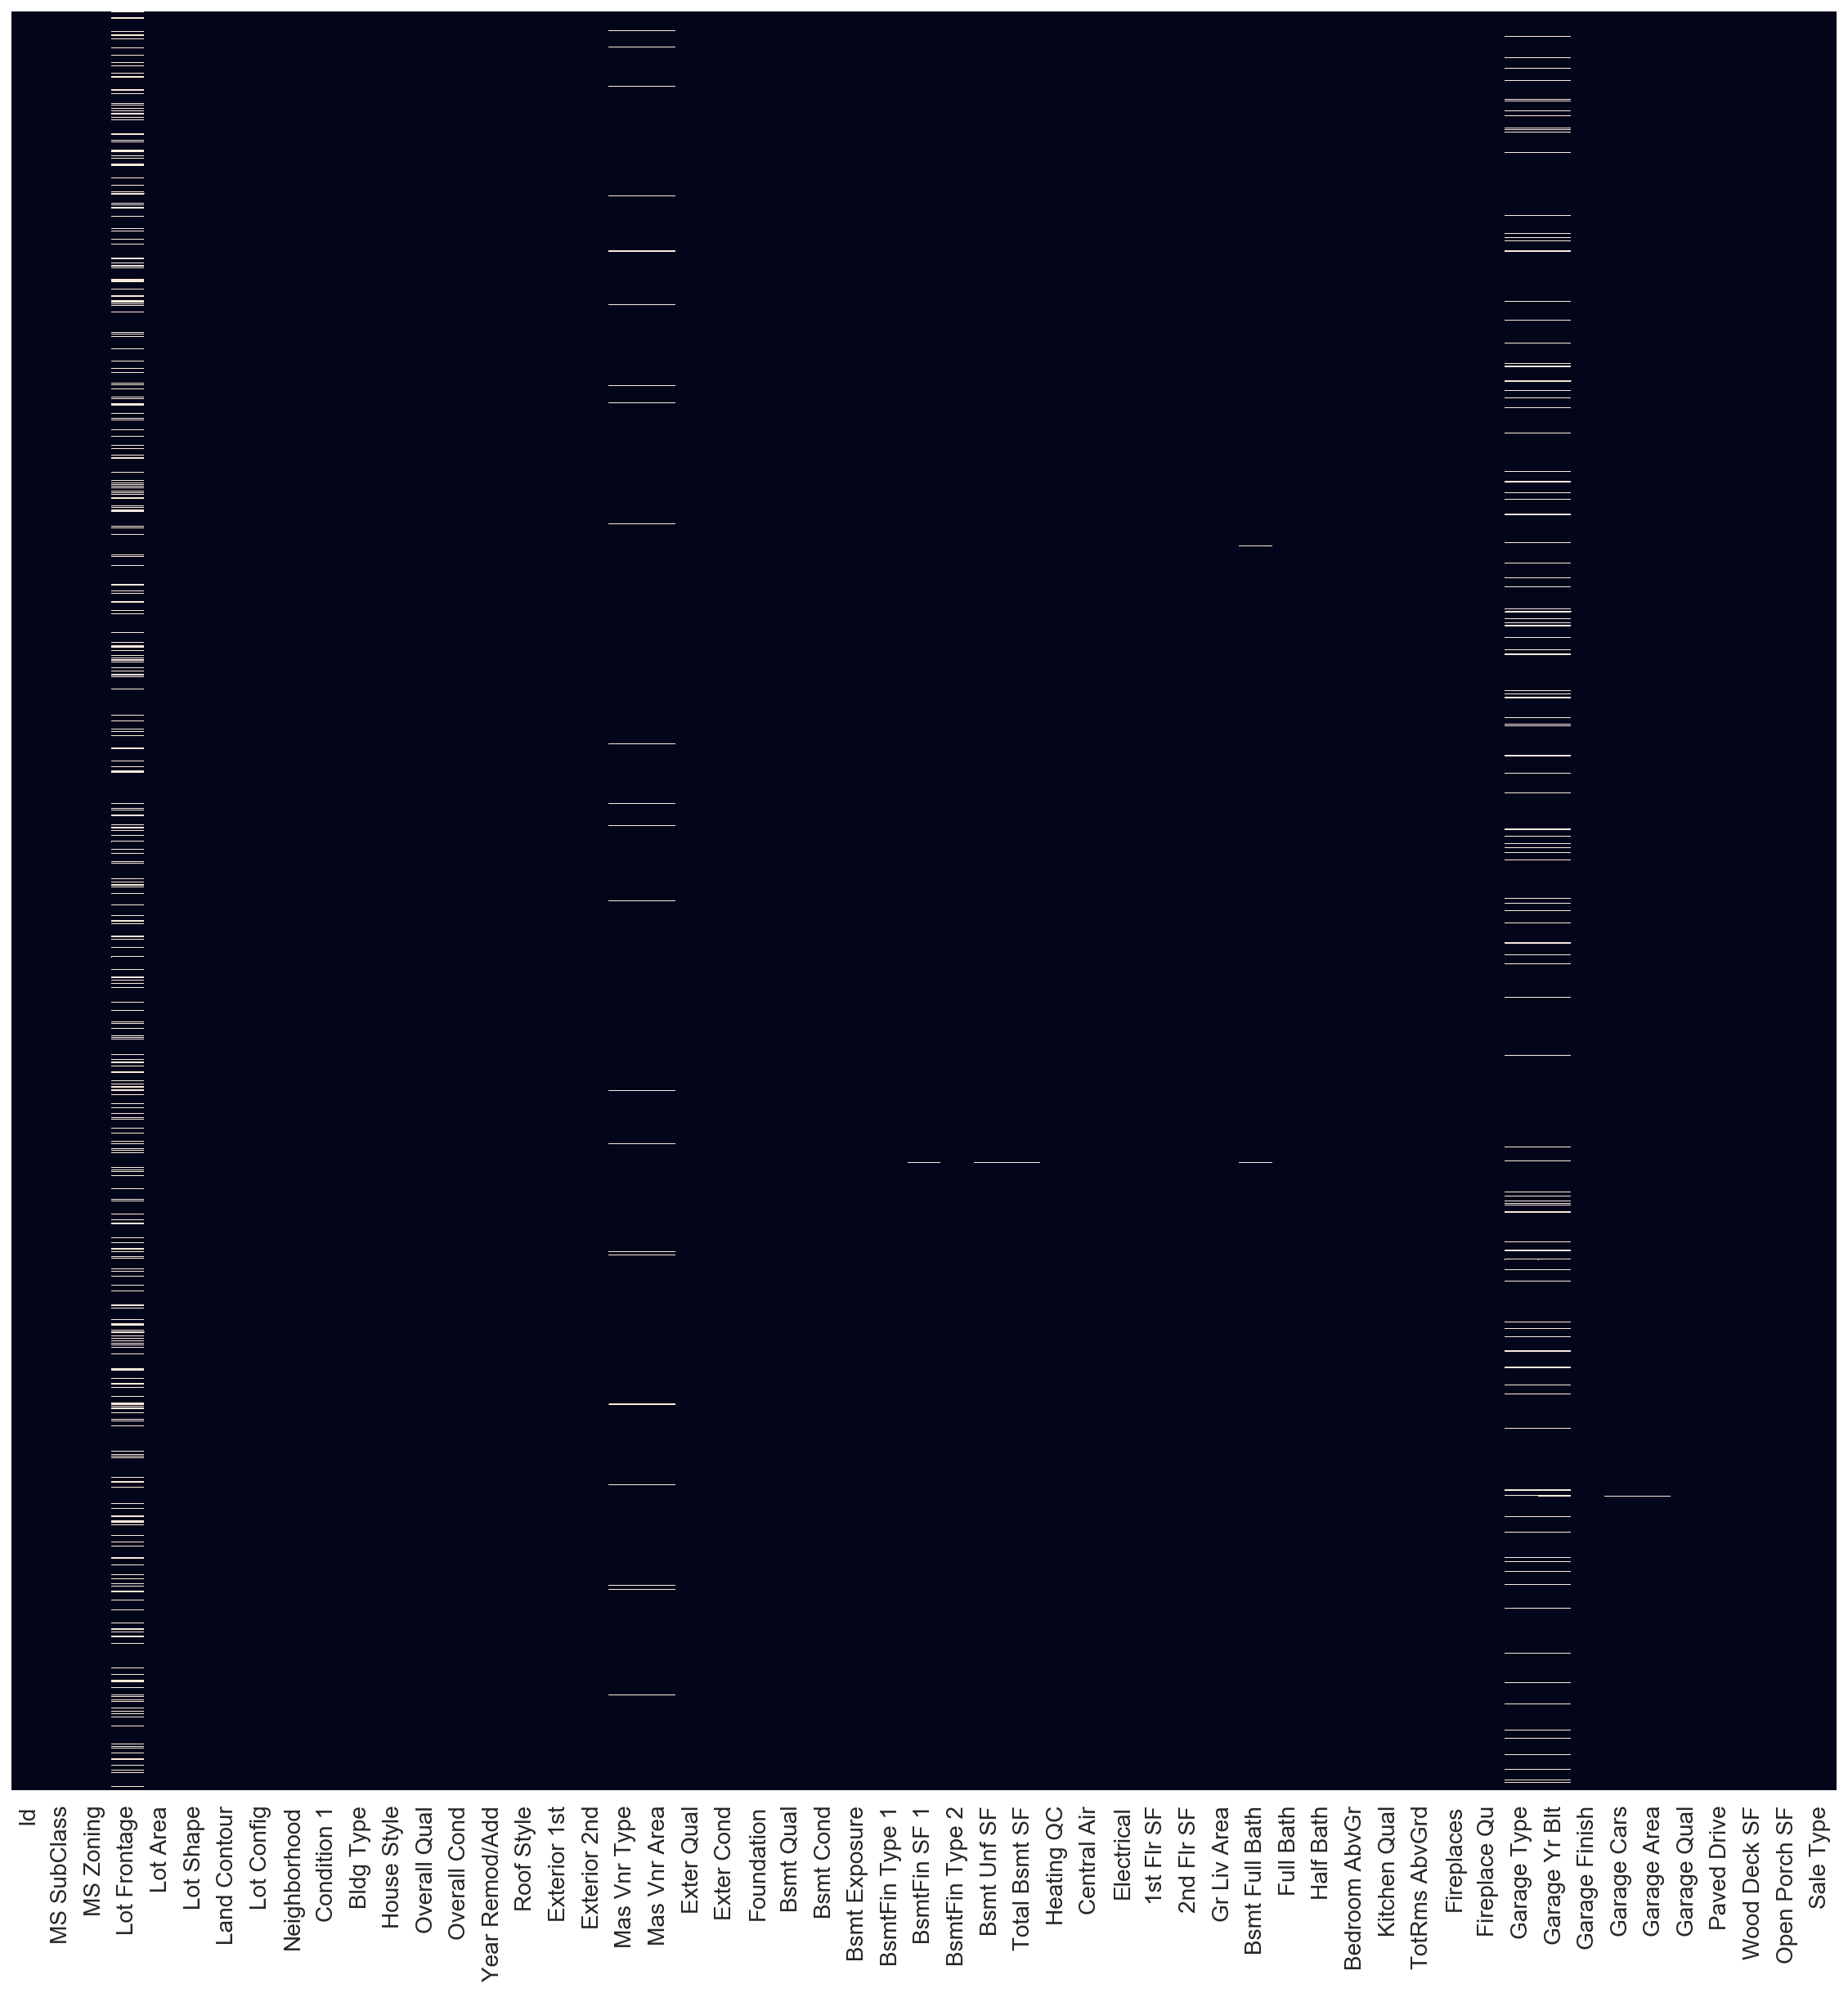

In [56]:
null_heatmap(df=X_train_dup, display='plot', figsize=(20,20))

---
__Findings from observing the null heatmap and rereading the data dictionary:__

It seems like `Mas Vnr Type` and `Mas Vnr Area` share the same null pattern. Null value occurs because the house didn't install any masonry veneer. Basically, the null is a type that is used to indicate houses without masonry veneer. It is not a missing value. Hence, I will assign 'None' to the null value in `Mas Vnr Type`. If both features has exactly the same null pattern, then I will simply assign 0 to all the null value in `Mas Vnr Area`.

In [57]:
X_train_dup[["Mas Vnr Type"]].isnull().sum()

Mas Vnr Type    22
dtype: int64

In [58]:
X_train_dup[["Mas Vnr Area"]].isnull().sum()

Mas Vnr Area    22
dtype: int64

In [59]:
X_train_dup.loc[X_train_dup["Mas Vnr Type"].isnull(), 
                ["Mas Vnr Type", "Mas Vnr Area"]].shape

(22, 2)

---
Both features has exactly the same null pattern, so I will assign 0 to all the null value in `Mas Vnr Area`.

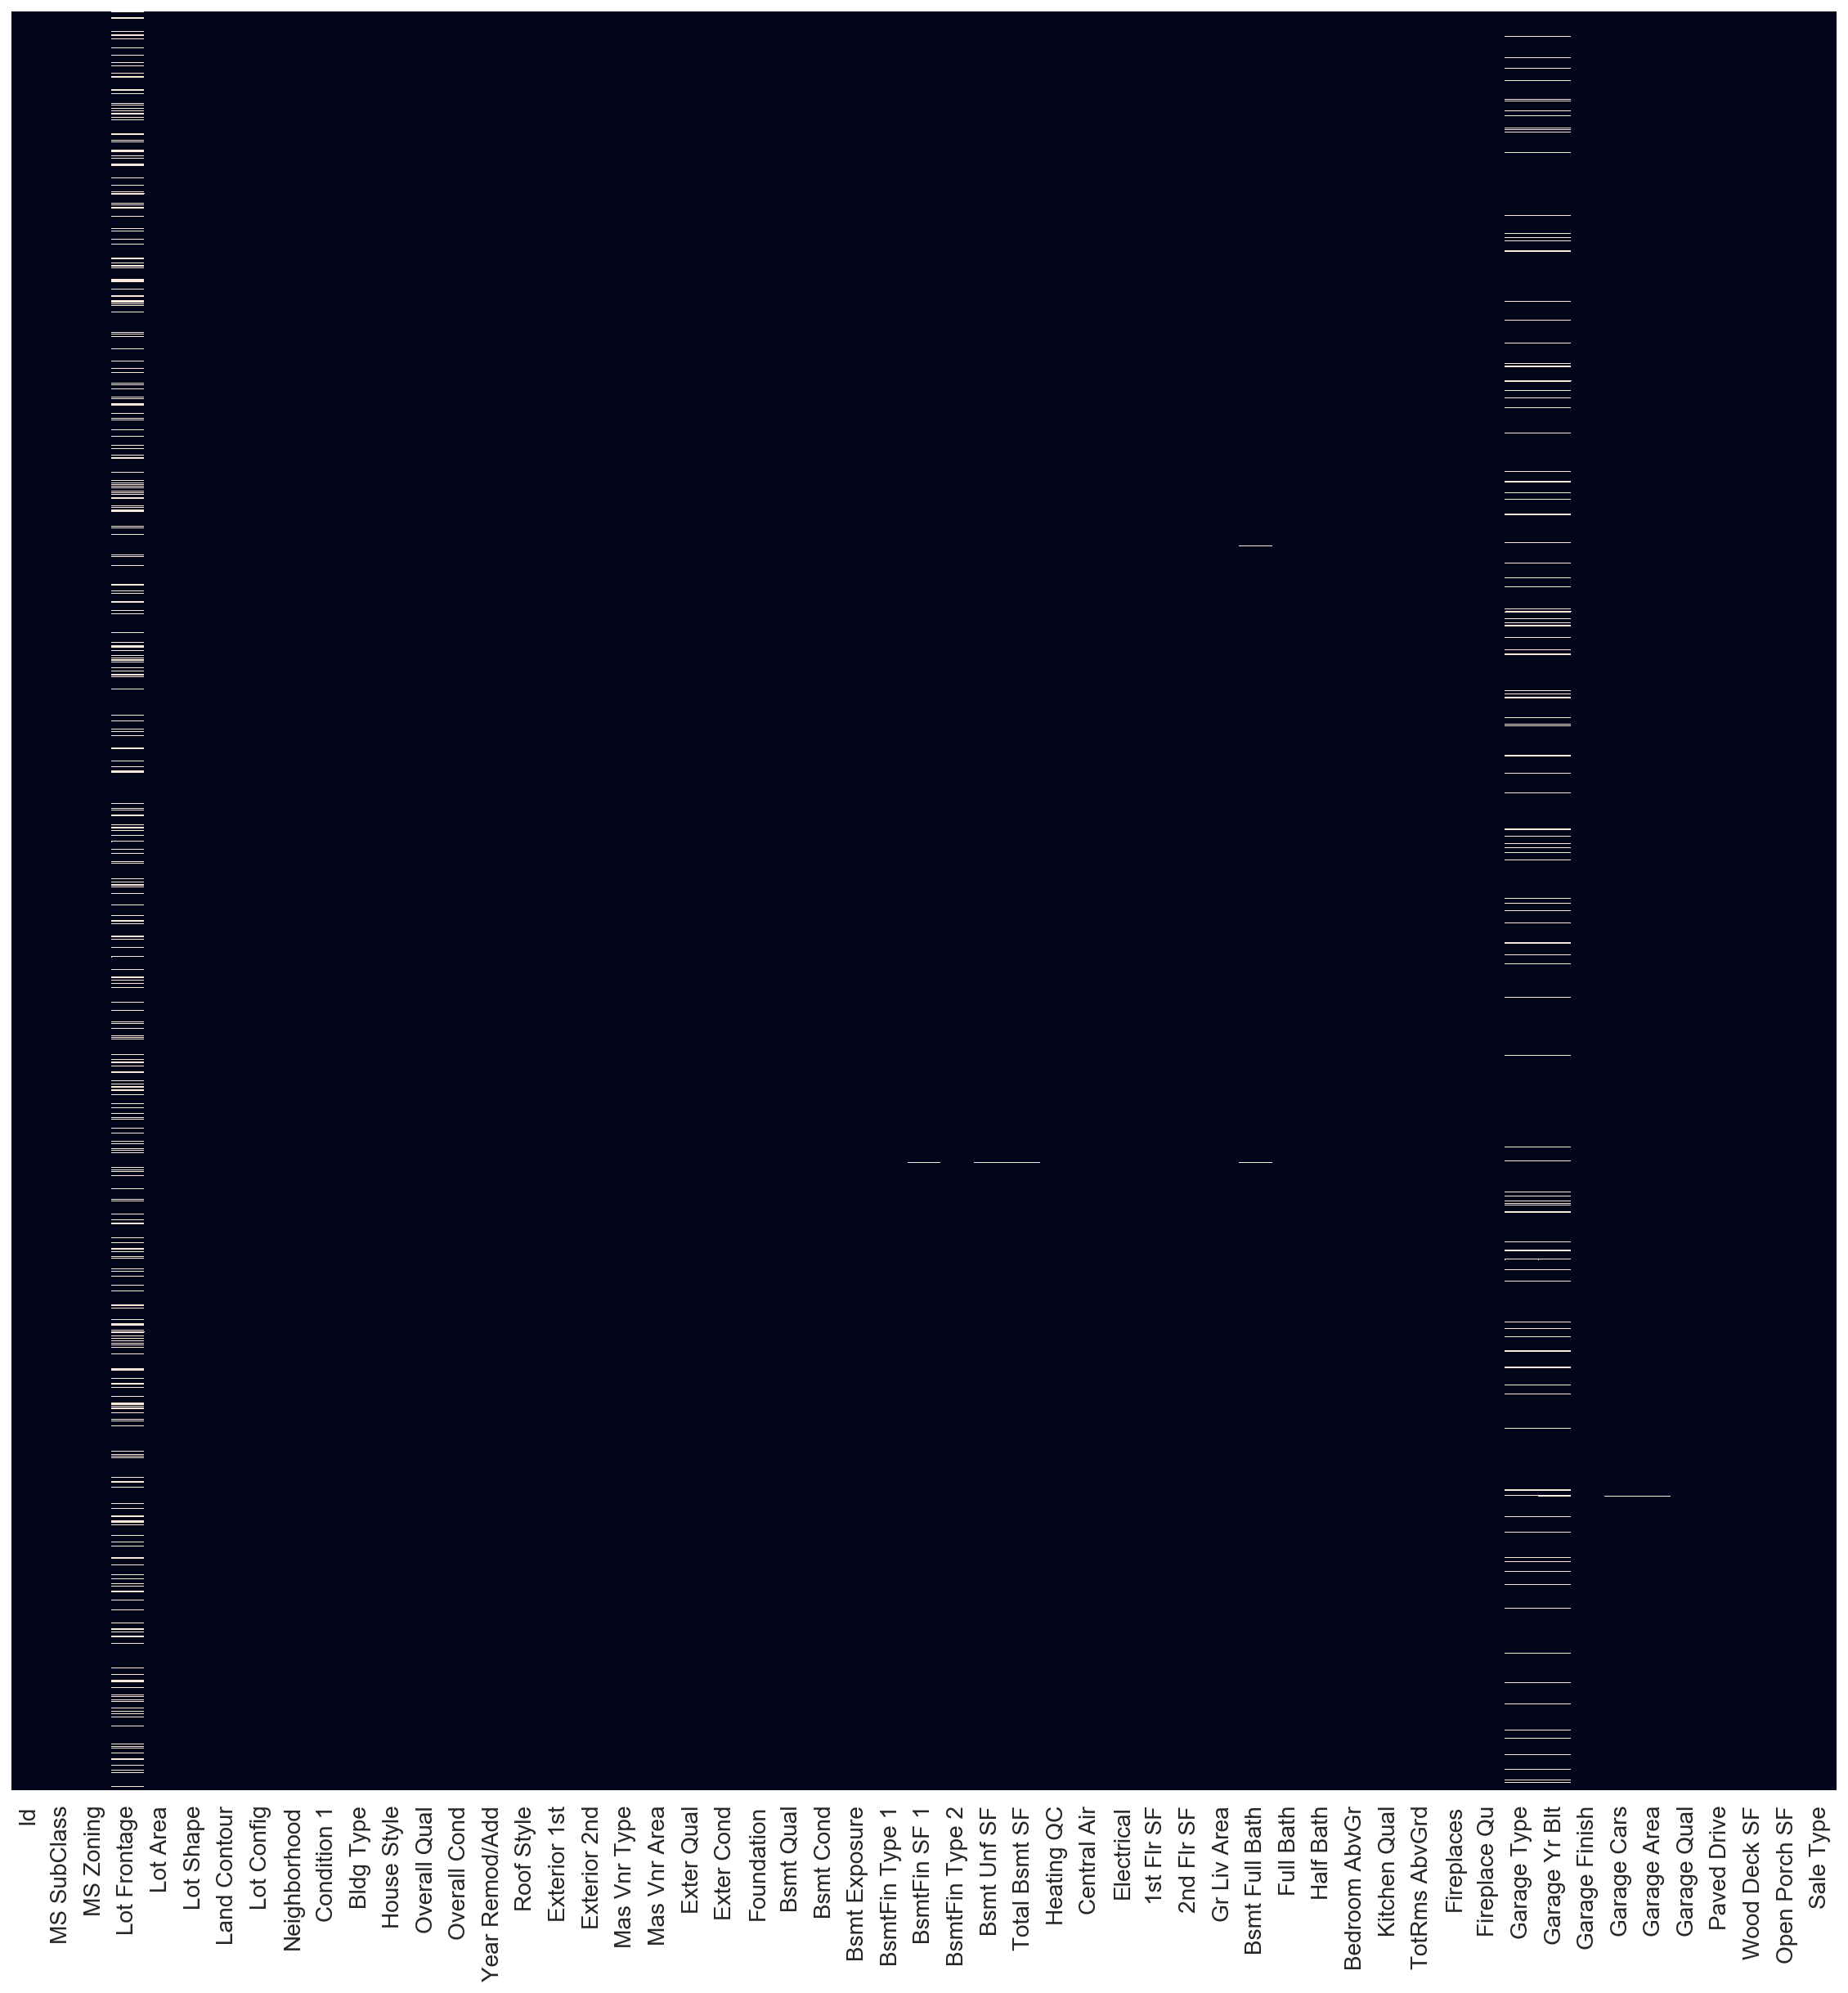

In [60]:
X_train_dup["Mas Vnr Type"].fillna(value='None', inplace=True)
X_train_dup["Mas Vnr Area"].fillna(value=0, inplace=True)

X_test_dup["Mas Vnr Type"].fillna(value='None', inplace=True)
X_test_dup["Mas Vnr Area"].fillna(value=0, inplace=True)

null_heatmap(df=X_train_dup, display='plot', figsize=(20,20))

---
__Findings from observing the null heatmap and rereading the data dictionary:__

`BsmtFin SF 1`, `Bsmt Unf SF`, `Total Bsmt SF`, `Bsmt Full Bath` features seem to have have null value on the same row. It may might be there isn't any basement available. 

In [61]:
X_train_dup[['BsmtFin SF 1', 'Bsmt Unf SF', 
             'Total Bsmt SF', 'Bsmt Full Bath']].isnull().sum()

BsmtFin SF 1      1
Bsmt Unf SF       1
Total Bsmt SF     1
Bsmt Full Bath    2
dtype: int64

In [62]:
X_train_dup.loc[X_train_dup['BsmtFin SF 1'].isnull(), 
                ['BsmtFin Type 1', 'BsmtFin SF 1', 'Bsmt Unf SF', 
                 'Total Bsmt SF', 'Bsmt Full Bath']]

,BsmtFin Type 1,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath
1327,0,NaN,NaN,NaN,NaN


---
-1 for `BsmtFin Type 1` means there isn't any basement for that particular house. `BsmtFin SF 1`, `Bsmt Unf SF`, and `Total Bsmt SF` are measured in square feet, which is a numerical data type. Hence, I will assign 0 to all the features.

In [63]:
cols = [
    'BsmtFin SF 1', 'Bsmt Unf SF', 'Total Bsmt SF'
]

for col in cols:
    X_train_dup[col].fillna(value=0, inplace=True)
    
X_train_dup[['BsmtFin SF 1', 'Bsmt Unf SF', 
             'Total Bsmt SF', 'Bsmt Full Bath']].isnull().sum()

BsmtFin SF 1      0
Bsmt Unf SF       0
Total Bsmt SF     0
Bsmt Full Bath    2
dtype: int64

---
__`Bsmt Full Bath` has 2 nulls, so have to check the 2 rows.__

In [64]:
X_train_dup.loc[X_train_dup['Bsmt Full Bath'].isnull(), 
                ['BsmtFin Type 1', 'BsmtFin SF 1', 'Bsmt Unf SF', 
                 'Total Bsmt SF', 'Bsmt Full Bath']]

,BsmtFin Type 1,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath
616,0,0.0,0.0,0.0,NaN
1327,0,0.0,0.0,0.0,NaN


---
`Bsmt Full Bath` represents the number of bathroom in the basement, so I will also assign 0 to the null values. 

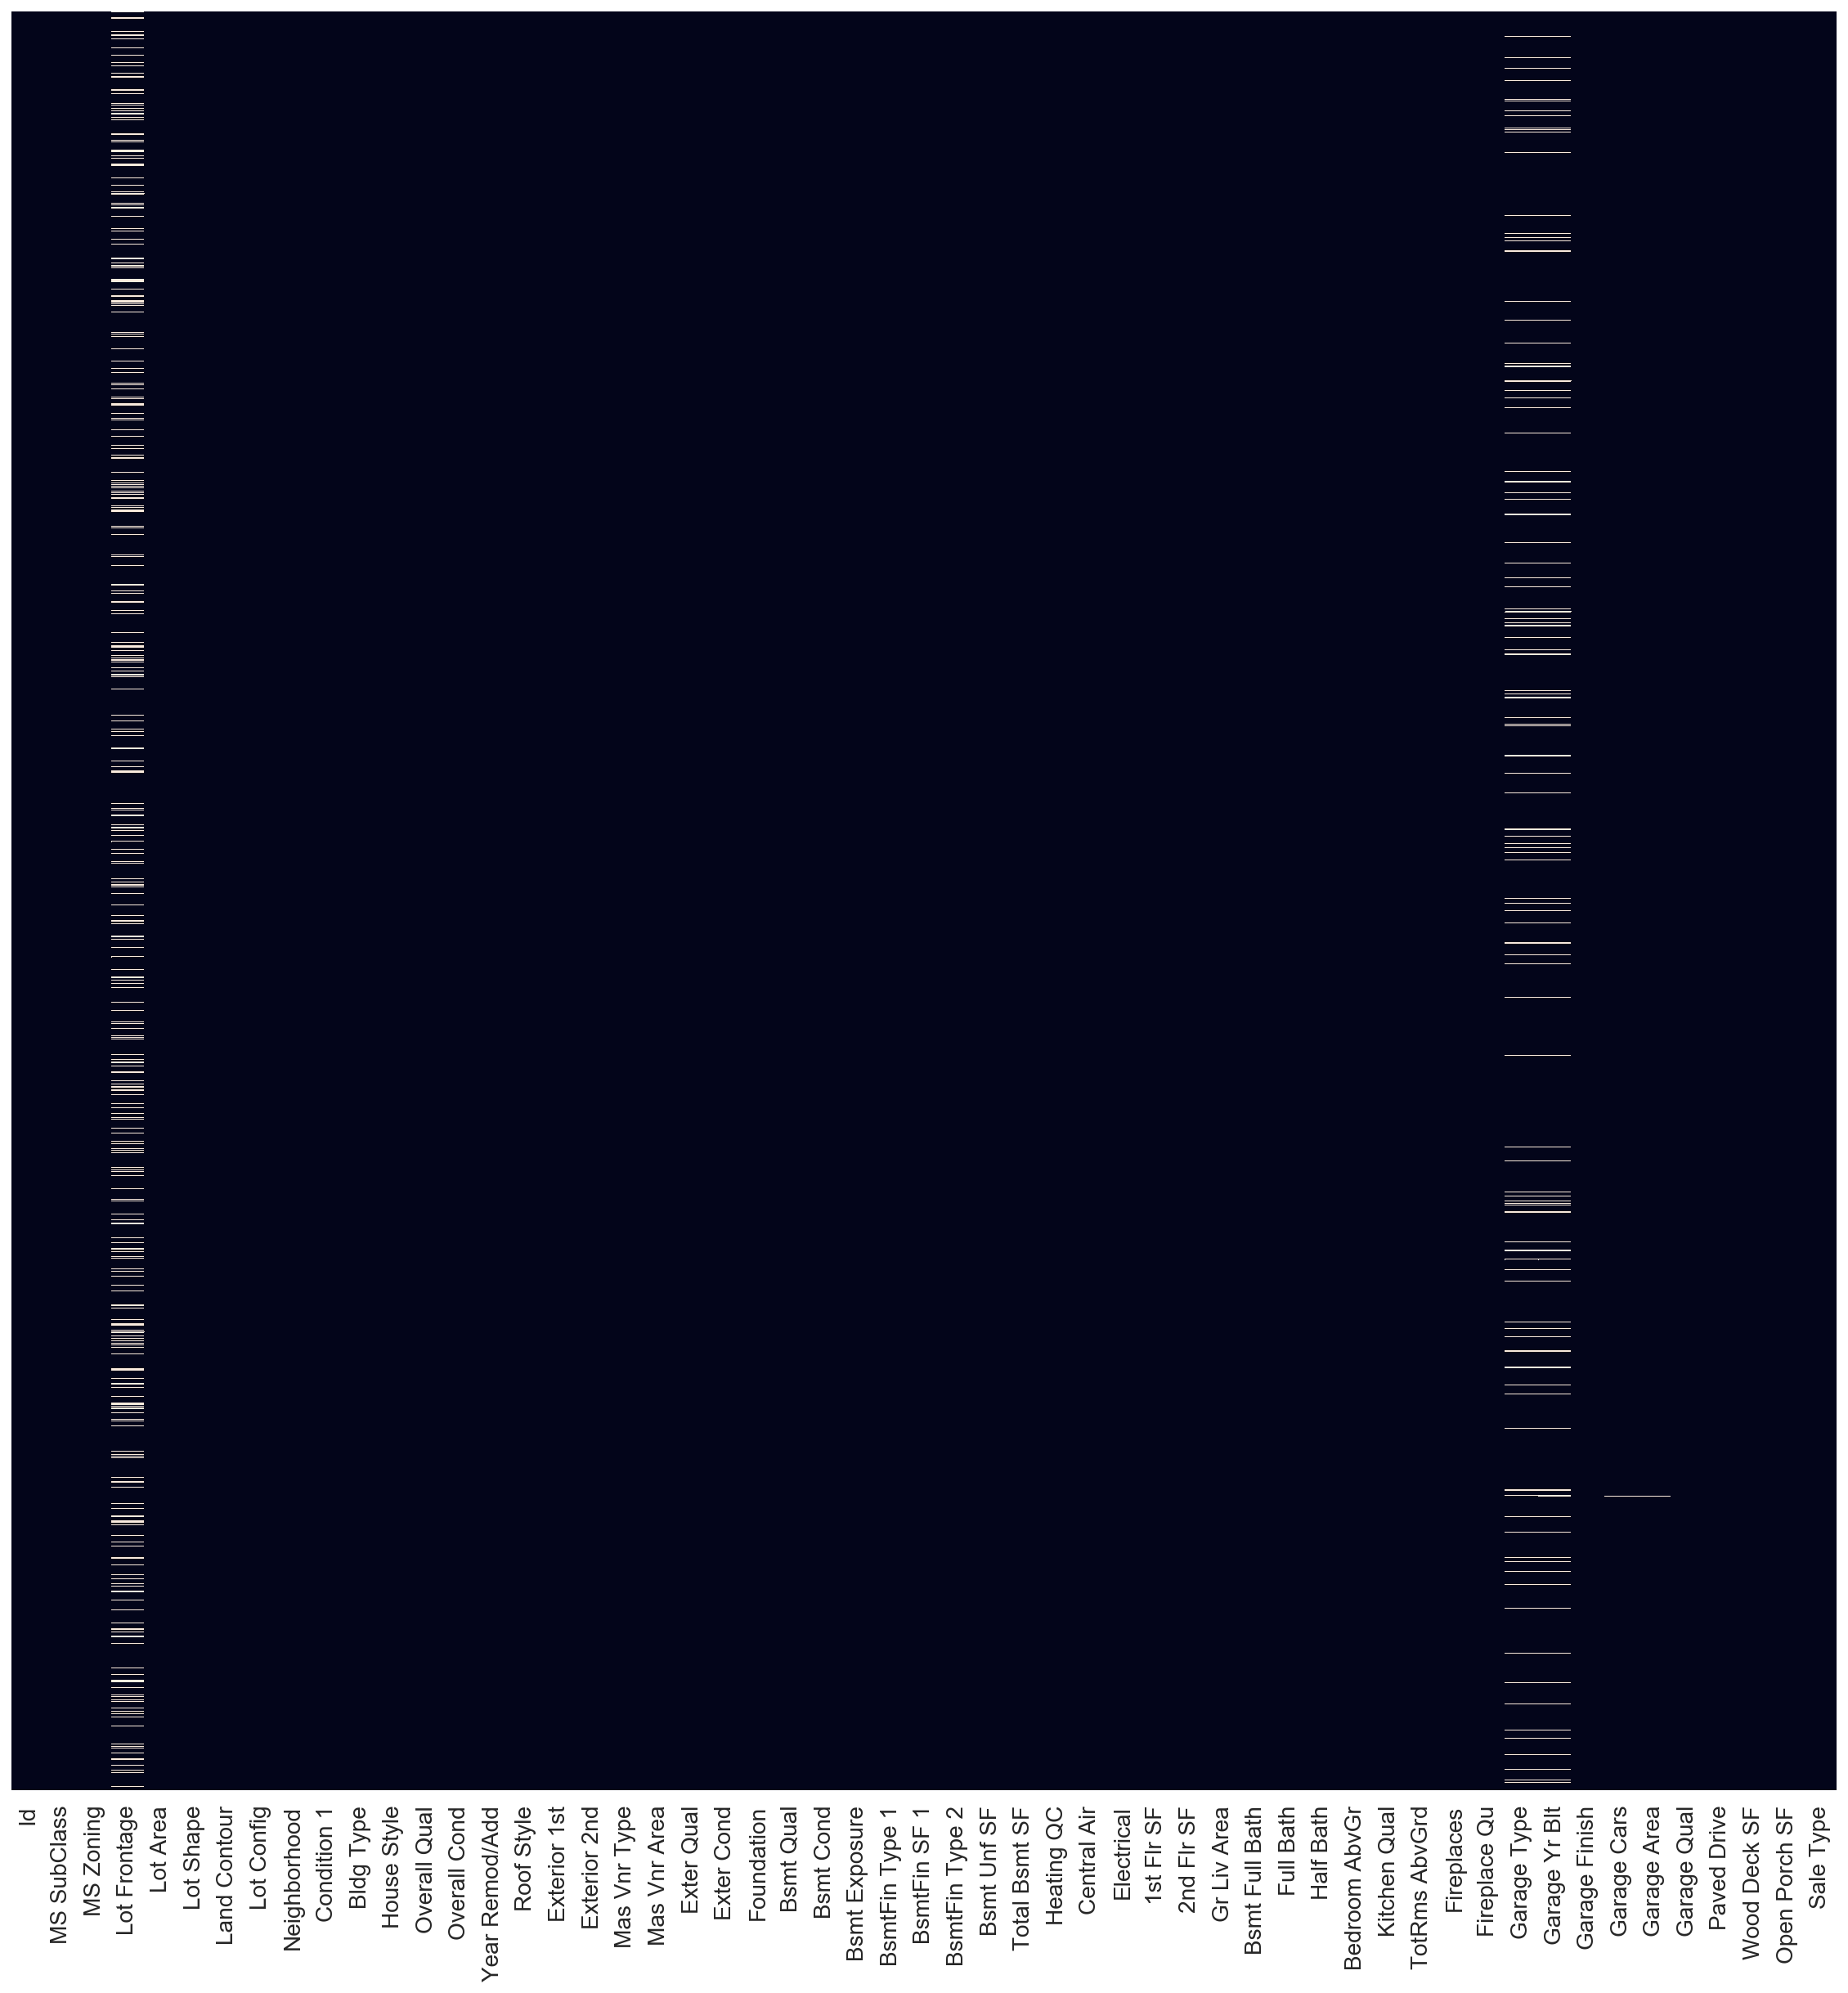

In [65]:
X_train_dup['Bsmt Full Bath'].fillna(value=0, inplace=True)

null_heatmap(df=X_train_dup, display='plot', figsize=(20,20))

---
__Findings from observing the null heatmap and rereading the data dictionary:__

`Garage Cars`, `Garage Area` features seem to have have null value on the same row also. It may might be there isn't any garage available. 

In [66]:
X_train_dup[['Garage Cars', 'Garage Area']].isnull().sum()

Garage Cars    1
Garage Area    1
dtype: int64

In [67]:
X_train_dup.loc[X_train_dup['Garage Cars'].isnull(), 
                ['Garage Type', 'Garage Cars', 'Garage Area']]

,Garage Type,Garage Cars,Garage Area
1712,Detchd,NaN,NaN


---
The table doesn't show what I expect to see. Need to find out whether it is the only row that contain that garage type 'Detchd'. 

In [68]:
X_train_dup.loc[X_train_dup['Garage Type'] == 'Detchd', 
                ['Garage Type', 'Garage Cars', 'Garage Area']]

,Garage Type,Garage Cars,Garage Area
2,Detchd,1.0,246.0
4,Detchd,2.0,484.0
8,Detchd,1.0,420.0
10,Detchd,1.0,264.0
13,Detchd,2.0,480.0
...,...,...,...
2026,Detchd,2.0,264.0
2030,Detchd,1.0,384.0
2035,Detchd,1.0,252.0
2047,Detchd,2.0,539.0


---
The answer is no. Since the null value only occurs on the `X_train_dup` and not `X_test_dup` set, I will just drop row 1712 for both `X_train_dup` and `y_train` instead.

In [69]:
X_train_dup.drop(index=1712, inplace=True)
y_train.drop(index=1712, inplace=True)

# Check whether it is dropped.
X_train_dup.loc[X_train_dup['Garage Cars'].isnull(), 
                ['Garage Type', 'Garage Cars', 'Garage Area']]

,Garage Type,Garage Cars,Garage Area


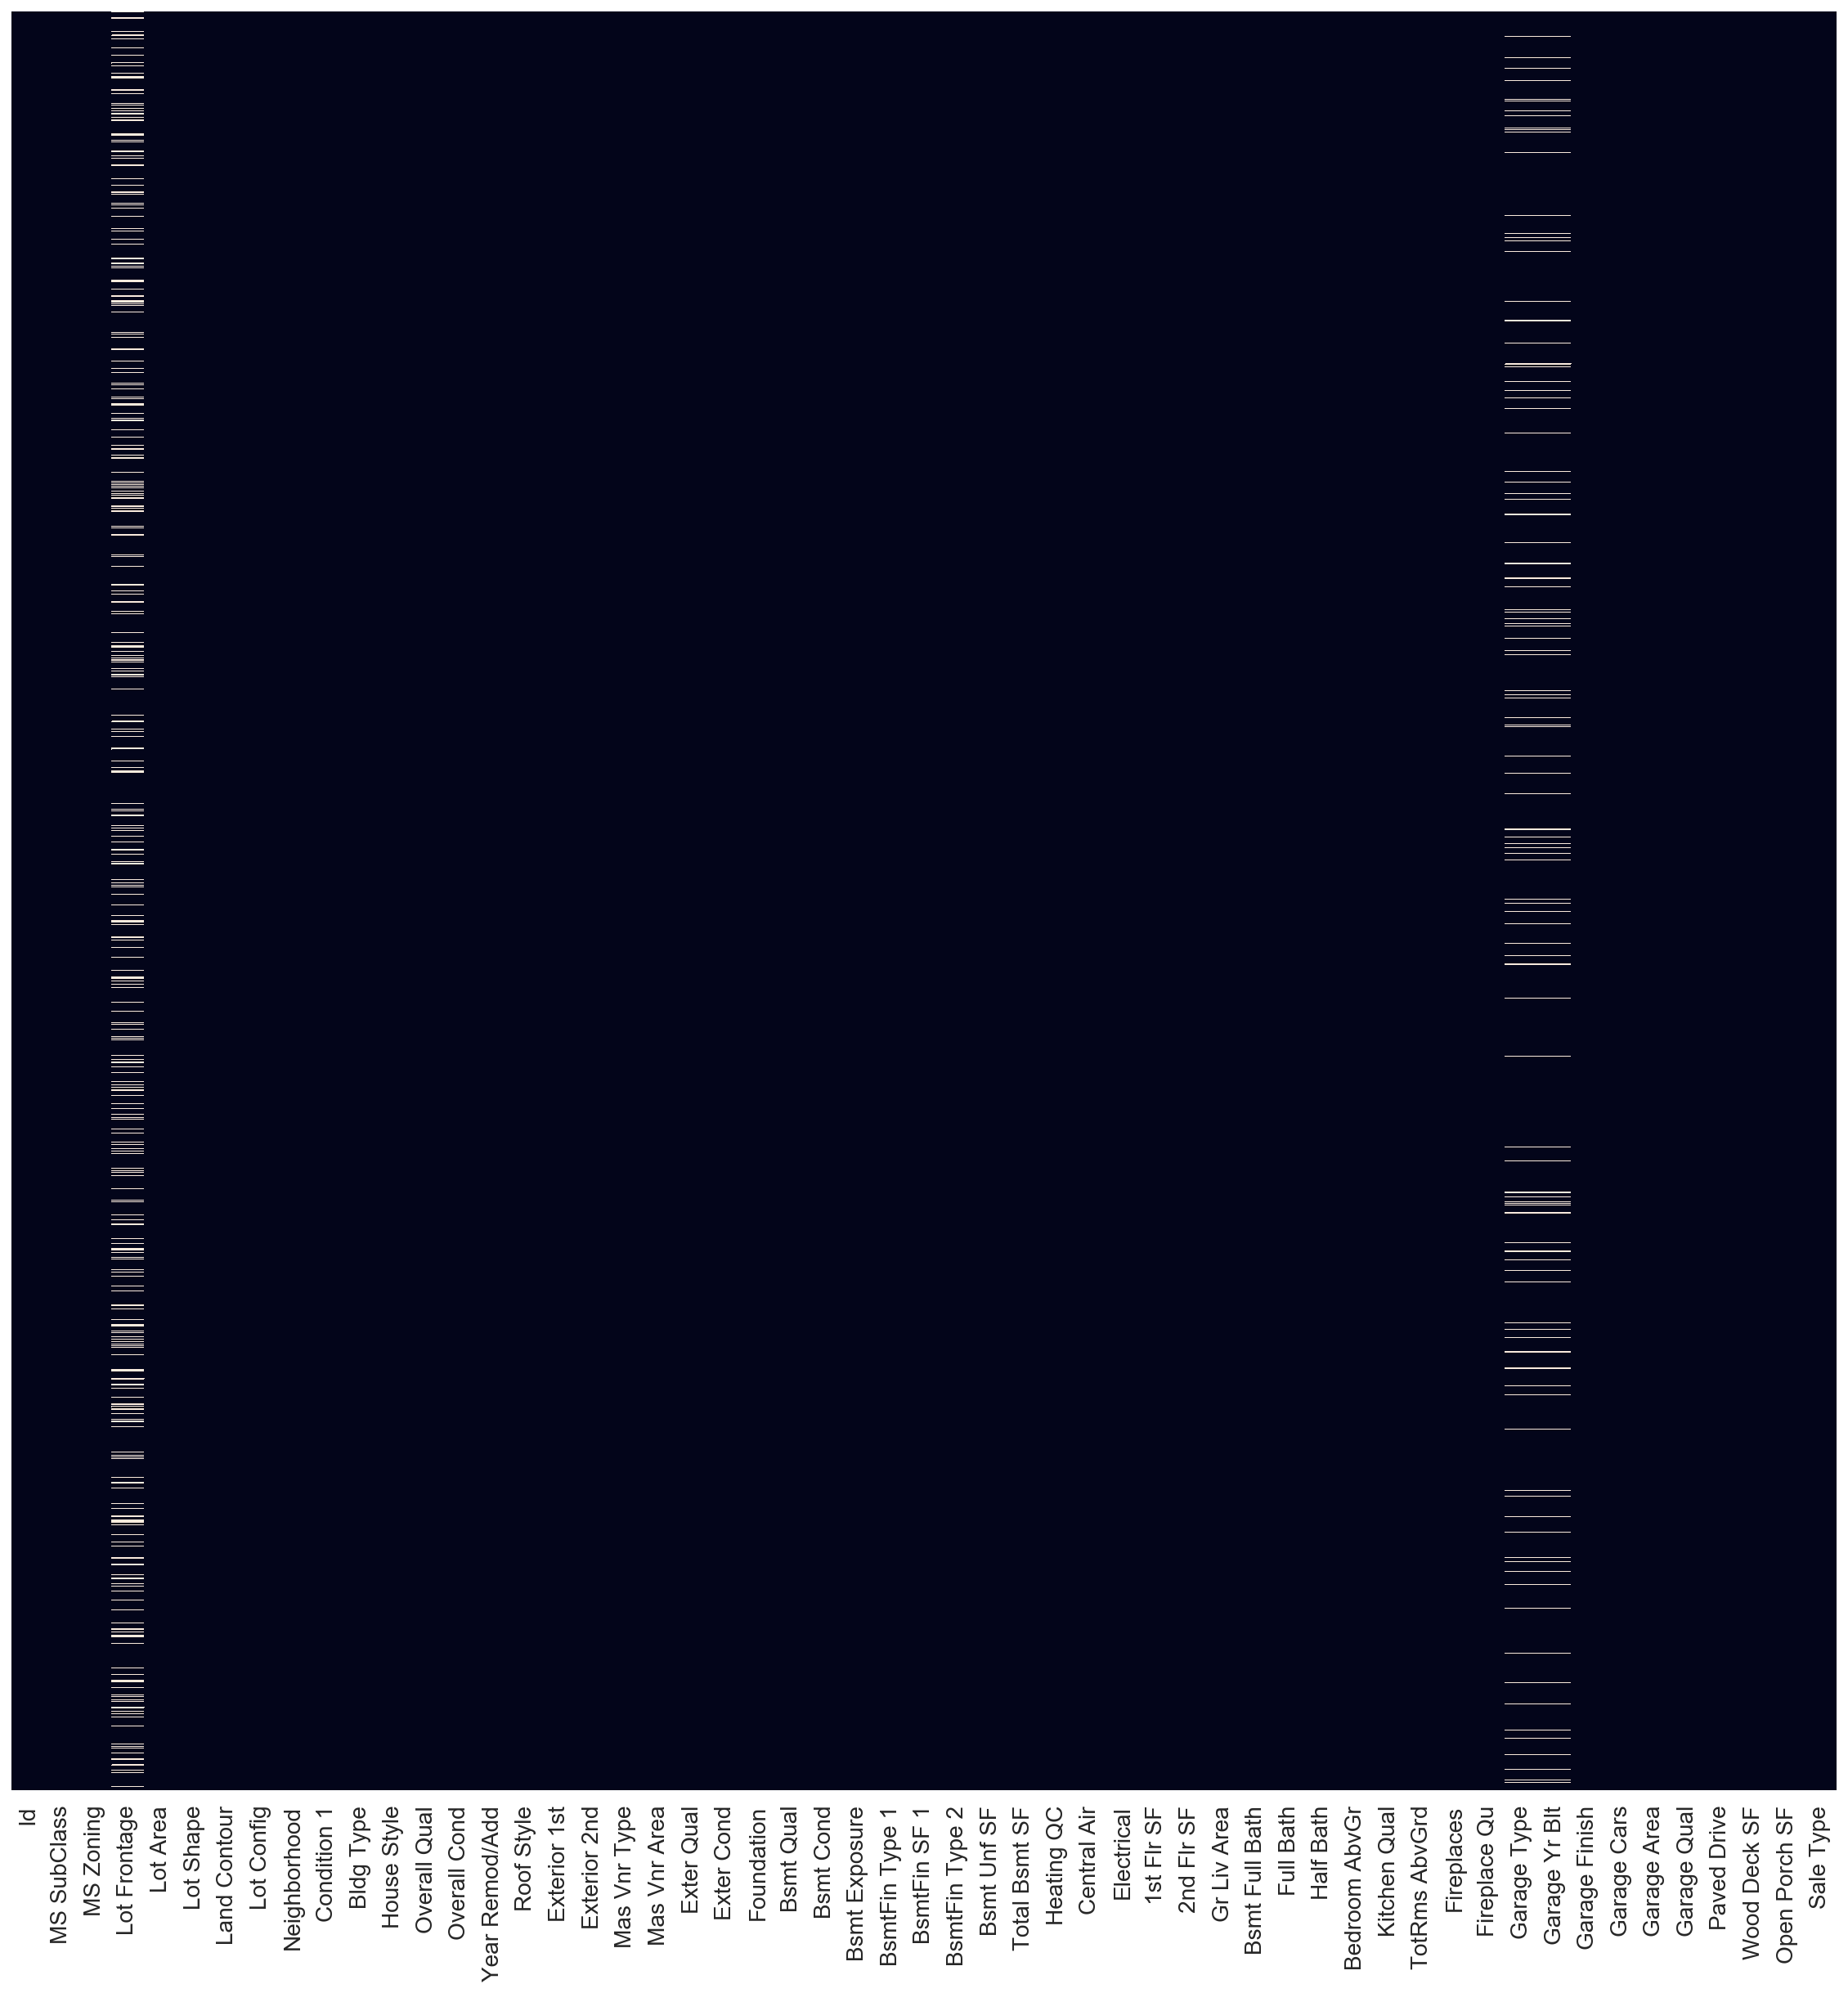

In [70]:
null_heatmap(df=X_train_dup, display='plot', figsize=(20,20))

---
__Findings from observing the null heatmap and rereading the data dictionary:__

`Garage Type`, `Garage Yr Blt` features seem share the same null pattern. Since `Garage Type` is null which means no garage available, it makes sense that the `Garage Yr Blt` should also be null.

In [71]:
X_train_dup[['Garage Type', 'Garage Yr Blt']].isnull().sum()

Garage Type      113
Garage Yr Blt    113
dtype: int64

In [72]:
X_train_dup.loc[X_train_dup['Garage Type'].isnull(), 
                ['Garage Type', 'Garage Yr Blt']]

,Garage Type,Garage Yr Blt
28,NaN,NaN
53,NaN,NaN
65,NaN,NaN
79,NaN,NaN
101,NaN,NaN
...,...,...
1991,NaN,NaN
2010,NaN,NaN
2027,NaN,NaN
2039,NaN,NaN


---
The table above shows that `Garage Type` and `Garage Yr Blt` have exactly the same null pattern. I will assign 'None' to `Garage Type` to signify no garage. There isn't any way to fill the null rows for the `Garage Yr Blt` year. 

I will drop the `Garage Yr Blt` feature instead of dropping a total of 113 rows.

In [73]:
remove_features = [
    "Garage Yr Blt"
]

X_train_dup.drop(columns=remove_features, inplace=True)
X_test_dup.drop(columns=remove_features, inplace=True)

remove_features_in_set(remove_features)

Removed: Garage Yr Blt.


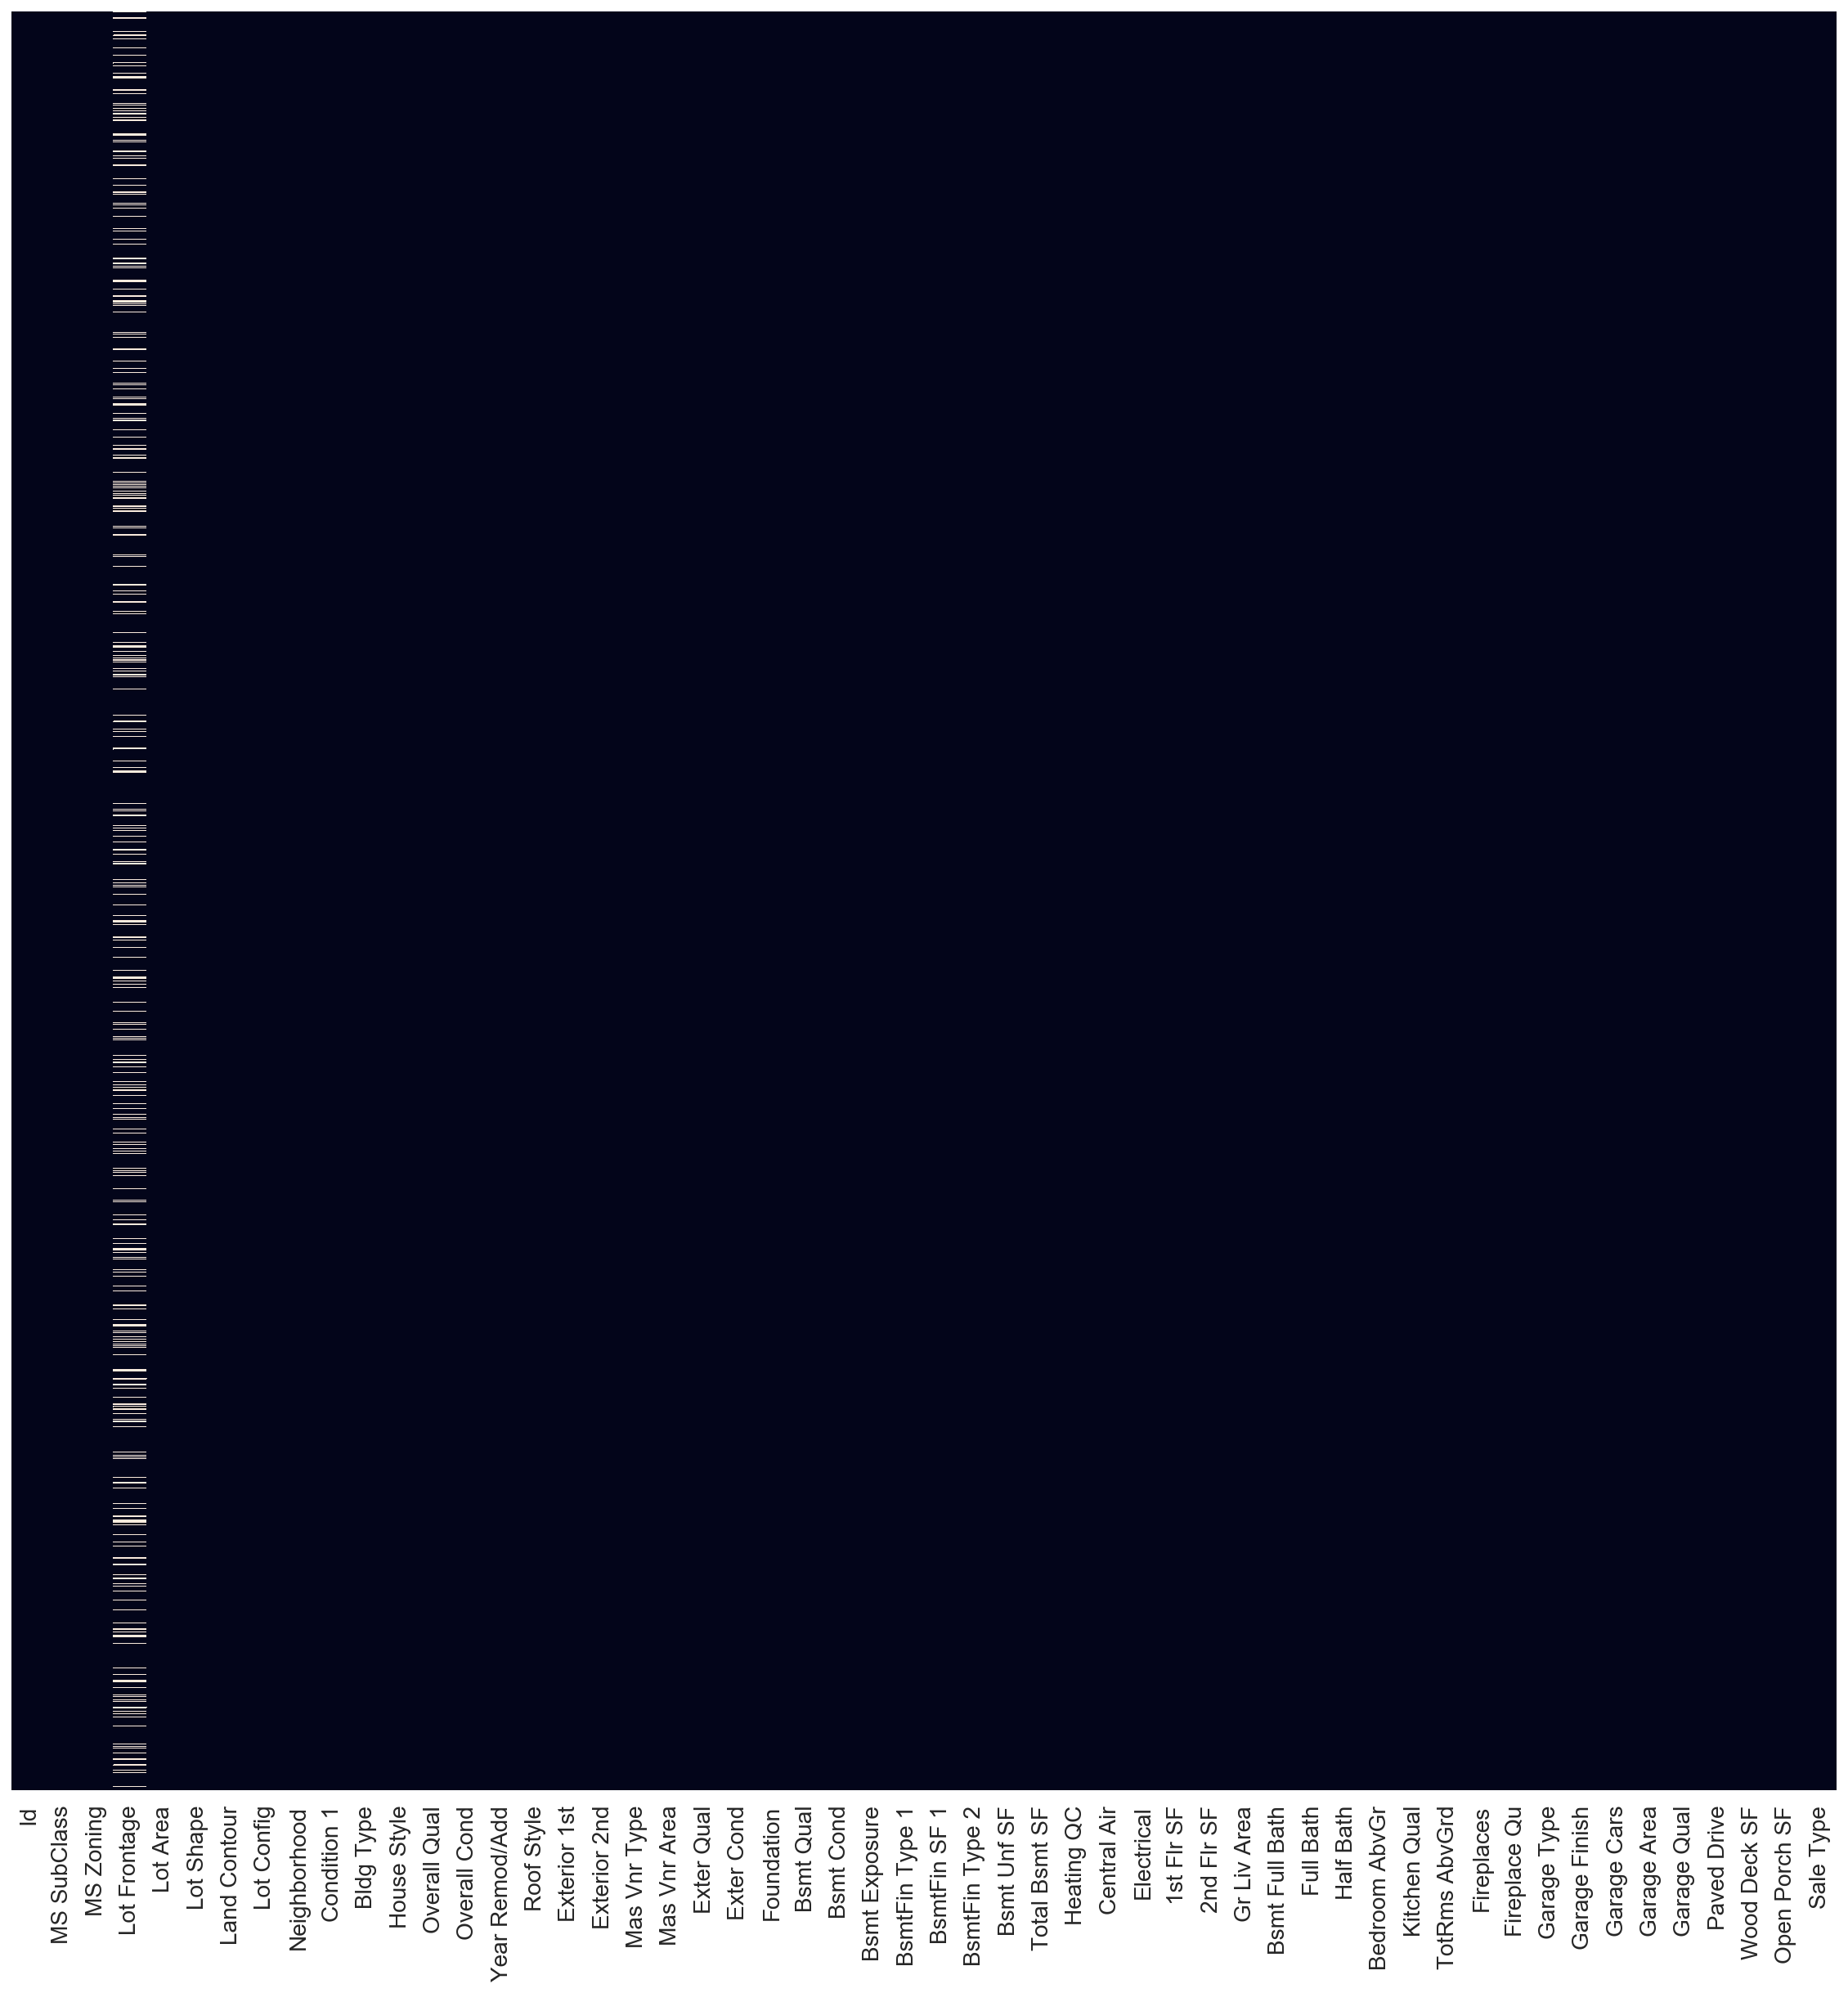

In [74]:
X_train_dup['Garage Type'].fillna(value="None", inplace=True)
X_test_dup['Garage Type'].fillna(value="None", inplace=True)

null_heatmap(df=X_train_dup, display='plot', figsize=(20,20))

In [75]:
nulls_proportion = null_heatmap(df=X_train_dup, display='series')

# Show the columns that contain nulls.
nulls_proportion[nulls_proportion > 0]

Lot Frontage    16.1
dtype: float64

In [76]:
nulls_proportion = null_heatmap(df=X_test_dup, display='series')

# Show the columns that contain nulls.
nulls_proportion[nulls_proportion > 0]

Lot Frontage    18.20
Electrical       0.11
dtype: float64

---
__Findings from observing the null heatmap and rereading the data dictionary:__

`Lot Frontage` has about 16% of null values for the `X_train_dup` and 18% of null values for the `X_test_dup`. Need to find out whether it is because there isn't any frontage available. I will start from finding features that are highly correlated with `Lot Frontage` to investigate my assumption.

In [77]:
X_train_dup.corr()["Lot Frontage"].sort_values(ascending=False)[:10]

Lot Frontage     1.000000
Lot Area         0.574085
1st Flr SF       0.463776
Gr Liv Area      0.384314
TotRms AbvGrd    0.362657
Garage Area      0.358457
Total Bsmt SF    0.354024
Garage Cars      0.297143
Fireplaces       0.253141
Fireplace Qu     0.232079
Name: Lot Frontage, dtype: float64

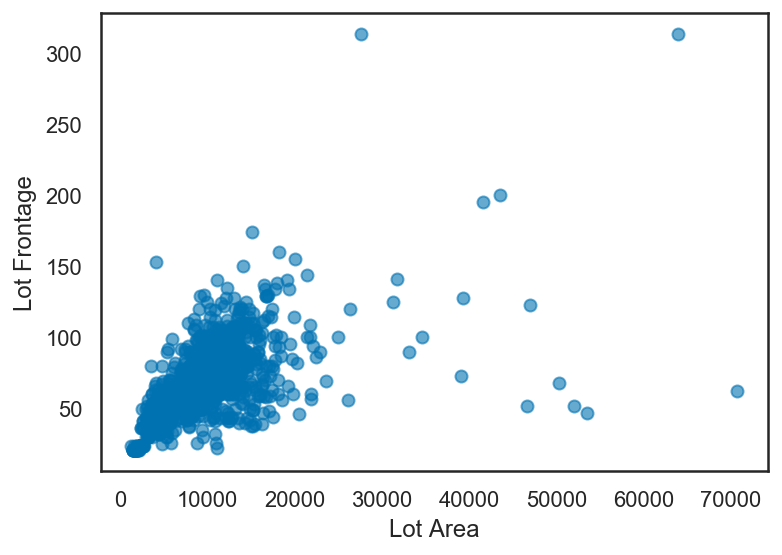

In [78]:
corr_plot(target="Lot Frontage", df=X_train_dup, cols=["Lot Area"], pairplot=False)

---
`Lot Area` is the most correlated feature, but isn't high enough to be able to impute value to the nulls via the regression slope. Other than `Lot Area`, there isn't any feature I can use to investigate my assumption.

In [79]:
X_train_dup["Lot Frontage"].describe()

count    1720.000000
mean       69.066279
std        23.262876
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: Lot Frontage, dtype: float64

---
The minimum value is 21. If it is 0, my assumption will not hold because the `Lot Frontage` will by default record houses that are without frontage as 0. Hence, I will assign 0 to `Lot Frontage`. 

In [80]:
X_train_dup["Lot Frontage"].fillna(value=0, inplace=True)
X_test_dup["Lot Frontage"].fillna(value=0, inplace=True)

nulls_proportion = null_heatmap(df=X_test_dup, calculate='sum', display='series')

# Show the columns that contain nulls.
nulls_proportion[nulls_proportion > 0]

Electrical    1
dtype: int64

---
It isn't possible that a house has no electrical system. I will fill the null with the most common value in `Electrical` feature instead.

In [81]:
(X_test_dup["Electrical"].value_counts(normalize=True) * 100).sort_values(ascending=False)

SBrkr    92.710706
FuseA     5.466970
FuseF     1.708428
FuseP     0.113895
Name: Electrical, dtype: float64

In [82]:
X_test_dup["Electrical"].fillna(value='SBrkr', inplace=True)
nulls_proportion = null_heatmap(df=X_test_dup, calculate='sum', display='series')

# Show the columns that contain nulls.
nulls_proportion[nulls_proportion > 0]

Series([], dtype: int64)

---
__A final check on whether there is any duplicated rows.__

In [83]:
X_train_dup.duplicated().sum()

0

## Label encode the categorical data on 'X_train' and 'X_test' and transform it into dummy variables. ##

Return to [Table of content:](#Table-of-content:)

---

__Update the `X_train` and `X_test` and make a duplicate of the `X_train` and `X_test` again.__ In case of mistake, I can use the orignals to overwrite the duplicates without rerunning the entire notebook.

In [84]:
X_train = X_train_dup
X_test = X_test_dup

X_train_dup = X_train.copy()
X_test_dup = X_test.copy()

__Label encode both `X_train_dup` and `X_test_dup`.__

In [85]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in categorical_cols:
    X_train_dup[col] = label_encoder.fit_transform(X_train_dup[col])

X_train_dup[categorical_cols].head(10)

,Neighborhood,Mas Vnr Type,Garage Type,Paved Drive,Sale Type,House Style,Lot Shape,Exterior 2nd,Lot Config,Central Air,Condition 1,Foundation,MS Zoning,Roof Style,MS SubClass,Electrical,Bldg Type,Exterior 1st
0,22,1,1,2,8,5,0,9,1,1,5,1,5,1,5,4,0,6
1,23,1,1,2,8,5,0,12,1,1,2,2,5,1,5,4,0,12
2,15,2,5,2,8,2,3,12,4,1,2,1,5,1,0,4,0,12
3,26,2,3,2,8,5,3,12,4,1,2,2,5,1,5,4,0,12
4,23,2,5,0,8,0,0,9,4,1,2,2,5,1,4,4,0,13
5,15,2,1,2,8,2,0,9,0,1,3,1,5,1,0,4,0,3
6,7,1,2,2,6,6,3,12,4,1,2,2,6,1,14,4,4,12
7,15,1,1,2,0,2,0,9,4,1,2,1,5,3,0,4,0,9
8,20,2,5,2,8,2,3,13,4,1,0,1,5,1,0,4,0,13
9,15,1,1,2,8,5,0,9,4,1,2,2,5,1,5,4,0,9


In [86]:
for col in categorical_cols:
    X_test_dup[col] = label_encoder.fit_transform(X_test_dup[col])
    
X_test_dup[categorical_cols].head(10)

,Neighborhood,Mas Vnr Type,Garage Type,Paved Drive,Sale Type,House Style,Lot Shape,Exterior 2nd,Lot Config,Central Air,Condition 1,Foundation,MS Zoning,Roof Style,MS SubClass,Electrical,Bldg Type,Exterior 1st
0,18,3,5,2,9,5,3,0,4,0,2,4,5,1,14,2,1,0
1,20,3,1,2,9,2,0,10,4,1,2,1,4,1,10,3,2,7
2,8,3,1,2,6,5,0,13,4,1,2,2,4,1,5,3,0,10
3,18,3,5,0,9,2,3,14,4,1,2,1,5,1,1,3,0,11
4,13,1,1,2,9,2,0,10,4,1,2,1,4,1,0,3,0,7
5,11,3,1,2,9,5,3,5,4,1,2,1,5,1,12,3,4,4
6,18,3,5,2,9,2,3,8,4,1,2,1,5,1,0,3,0,6
7,5,3,5,2,9,2,0,10,1,1,2,1,4,1,0,3,0,5
8,22,3,1,2,9,5,3,13,4,1,2,2,1,1,12,3,4,10
9,12,3,5,2,9,2,3,10,4,1,2,1,4,1,0,3,0,7


__Create dummy variables for both `X_train_dup` and `X_test_dup`.__

In [87]:
def create_dummies(df=None, dummy_cols=None):
    dummies = pd.get_dummies(df, columns=dummy_cols, drop_first=True, 
                             dummy_na=False, prefix=dummy_cols)
    return dummies

X_train_dup = create_dummies(df=X_train_dup, dummy_cols=list(categorical_cols))
X_train_dup

,Id,Lot Frontage,Lot Area,Land Contour,Overall Qual,Overall Cond,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen Qual,TotRms AbvGrd,Fireplaces,Fireplace Qu,Garage Finish,Garage Cars,Garage Area,Garage Qual,Wood Deck SF,Open Porch SF,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,Neighborhood_5,Neighborhood_6,Neighborhood_7,Neighborhood_8,Neighborhood_9,Neighborhood_10,Neighborhood_11,Neighborhood_12,Neighborhood_13,Neighborhood_14,...,Foundation_4,Foundation_5,MS Zoning_1,MS Zoning_2,MS Zoning_3,MS Zoning_4,MS Zoning_5,MS Zoning_6,Roof Style_1,Roof Style_2,Roof Style_3,Roof Style_4,Roof Style_5,MS SubClass_1,MS SubClass_2,MS SubClass_3,MS SubClass_4,MS SubClass_5,MS SubClass_6,MS SubClass_7,MS SubClass_8,MS SubClass_9,MS SubClass_10,MS SubClass_11,MS SubClass_12,MS SubClass_13,MS SubClass_14,MS SubClass_15,Electrical_1,Electrical_2,Electrical_3,Electrical_4,Bldg Type_1,Bldg Type_2,Bldg Type_3,Bldg Type_4,Exterior 1st_1,Exterior 1st_2,Exterior 1st_3,Exterior 1st_4,Exterior 1st_5,Exterior 1st_6,Exterior 1st_7,Exterior 1st_8,Exterior 1st_9,Exterior 1st_10,Exterior 1st_11,Exterior 1st_12,Exterior 1st_13,Exterior 1st_14
0,109,0.0,13517,3,6,8,5,289.0,4,3,3,3,1,6,533.0,1,192.0,725.0,5,725,754,1479,0.0,2,1,3,4,6,0,0,2,2.0,475.0,3,0,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,544,43.0,11492,3,7,5,13,132.0,4,3,4,3,1,6,637.0,1,276.0,913.0,5,913,1209,2122,1.0,2,1,4,4,8,1,3,2,2.0,559.0,3,0,74,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,153,68.0,7922,3,5,7,3,0.0,3,4,3,3,1,6,731.0,1,326.0,1057.0,3,1057,0,1057,1.0,1,0,3,4,5,0,0,1,1.0,246.0,3,0,52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,318,73.0,9802,3,5,5,3,0.0,3,3,4,3,1,1,0.0,1,384.0,384.0,4,744,700,1444,0.0,2,1,3,3,7,0,0,3,2.0,400.0,3,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,255,82.0,14235,3,6,8,17,0.0,3,3,2,4,1,1,0.0,1,676.0,676.0,3,831,614,1445,0.0,2,0,3,3,6,0,0,1,2.0,484.0,3,0,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,79.0,11449,1,8,5,3,0.0,4,3,4,3,3,6,1011.0,1,873.0,1884.0,5,1728,0,1728,1.0,2,0,3,4,7,1,4,3,2.0,520.0,3,0,276,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2047,785,0.0,12342,3,4,5,60,0.0,3,3,3,3,1,4,262.0,1,599.0,861.0,5,861,0,861,0.0,1,0,1,3,4,0,0,1,2.0,539.0,3,158,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2048,916,57.0,7558,2,6,6,60,0.0,3,3,3,3,1,1,0.0,1,896.0,896.0,4,1172,741,1913,0.0,1,1,3,3,9,1,3,1,2.0,342.0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2049,639,80.0,10400,3,4,5,54,0.0,3,3,3,3,1,3,155.0,2,295.0,1200.0,3,1200,0,1200,1.0,1,0,3,3,6,2,4,1,1.0,294.0,3,0,189,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [88]:
X_test_dup = create_dummies(df=X_test_dup, dummy_cols=list(categorical_cols))
X_test_dup

,Id,Lot Frontage,Lot Area,Land Contour,Overall Qual,Overall Cond,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen Qual,TotRms AbvGrd,Fireplaces,Fireplace Qu,Garage Finish,Garage Cars,Garage Area,Garage Qual,Wood Deck SF,Open Porch SF,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,Neighborhood_5,Neighborhood_6,Neighborhood_7,Neighborhood_8,Neighborhood_9,Neighborhood_10,Neighborhood_11,Neighborhood_12,Neighborhood_13,Neighborhood_14,...,Condition 1_7,Condition 1_8,Foundation_1,Foundation_2,Foundation_3,Foundation_4,Foundation_5,MS Zoning_1,MS Zoning_2,MS Zoning_3,MS Zoning_4,MS Zoning_5,Roof Style_1,Roof Style_2,Roof Style_3,Roof Style_4,Roof Style_5,MS SubClass_1,MS SubClass_2,MS SubClass_3,MS SubClass_4,MS SubClass_5,MS SubClass_6,MS SubClass_7,MS SubClass_8,MS SubClass_9,MS SubClass_10,MS SubClass_11,MS SubClass_12,MS SubClass_13,MS SubClass_14,Electrical_1,Electrical_2,Electrical_3,Bldg Type_1,Bldg Type_2,Bldg Type_3,Bldg Type_4,Exterior 1st_1,Exterior 1st_2,Exterior 1st_3,Exterior 1st_4,Exterior 1st_5,Exterior 1st_6,Exterior 1st_7,Exterior 1st_8,Exterior 1st_9,Exterior 1st_10,Exterior 1st_11,Exterior 1st_12
0,2658,69.0,9142,3,6,8,60,0.0,3,2,2,3,1,1,0,1,1020,1020,4,908,1020,1928,0,2,0,4,2,9,0,-1,1,1,440,1,0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2718,0.0,9662,3,5,4,33,0.0,3,3,4,3,1,1,0,1,1967,1967,3,1967,0,1967,0,2,0,6,3,10,0,-1,3,2,580,3,170,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2414,58.0,17104,3,7,5,4,0.0,4,3,4,4,3,6,554,1,100,654,5,664,832,1496,1,2,1,3,4,7,1,4,2,2,426,3,100,24,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1989,60.0,8520,3,5,6,4,0.0,4,3,3,3,1,1,0,1,968,968,3,968,0,968,0,1,0,2,3,5,0,-1,1,2,480,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,625,0.0,9500,3,6,5,47,247.0,3,3,4,3,1,4,609,1,785,1394,4,1394,0,1394,1,1,1,3,3,6,2,4,2,2,514,3,0,76,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,1662,80.0,8000,3,6,6,36,0.0,3,3,3,3,1,5,931,2,0,1084,3,1084,793,1877,1,2,1,4,3,8,1,3,1,2,488,3,0,96,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
875,1234,90.0,14670,3,6,7,11,410.0,4,4,3,3,1,4,575,1,529,1104,5,1104,884,1988,0,2,1,4,4,9,1,4,2,2,480,3,0,230,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
876,1373,55.0,8250,3,5,5,42,0.0,3,3,3,3,1,4,250,2,210,952,5,1211,0,1211,0,1,0,3,3,5,1,3,1,1,322,3,0,63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
877,1672,60.0,9000,3,4,6,39,0.0,3,3,3,3,1,5,616,1,248,864,3,864,0,864,0,1,0,3,3,5,0,-1,1,2,528,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [89]:
X_train_dup.shape, X_test_dup.shape

((2050, 172), (879, 168))

---
Both `X_train_dup` and `X_test_dup` do not share the same number of columns. This is due to the difference in the categorical values before transforming them into dummy variables. I will add the extra dummy variables (features) to both the `X_train_dup` and `X_test_dup`.

__Store 2 lists of dummy variables from both the `X_train_dup` and `X_test_dup`.__

In [90]:
non_dummy_length = X_train.shape[1] - len(categorical_cols)
X_train_dummy_cols = X_train_dup.iloc[:, non_dummy_length:].columns

non_dummy_length = X_test.shape[1] - len(categorical_cols)
X_test_dummy_cols = X_test_dup.iloc[:, non_dummy_length:].columns

__Find the extra dummy variables in both the `X_train_dup` and `X_test_dup`.__

In [91]:
def find_extra_dummies(dummy_cols_1, dummy_cols_2):
    non_exist_dummy_cols = []
    for dummy_col in dummy_cols_1:
        if dummy_col in dummy_cols_2:
            pass
        else:
            non_exist_dummy_cols.append(dummy_col)
    return non_exist_dummy_cols
        
extra_dummies_in_X_train = find_extra_dummies(X_train_dummy_cols, X_test_dummy_cols)
extra_dummies_in_X_test = find_extra_dummies(X_test_dummy_cols, X_train_dummy_cols)

extra_dummies_in_X_train, extra_dummies_in_X_test 

(['Neighborhood_26',
  'Neighborhood_27',
  'MS Zoning_6',
  'MS SubClass_15',
  'Electrical_4',
  'Exterior 1st_13',
  'Exterior 1st_14'],
 ['Mas Vnr Type_4', 'Sale Type_9', 'Exterior 2nd_15'])

---
__Add the extra dummy variables to both the `X_train_dup` and `X_test_dup`.__

In [92]:
for dummy in extra_dummies_in_X_test:
    X_train_dup[dummy] = 0
    
for dummy in extra_dummies_in_X_train:
    X_test_dup[dummy] = 0

X_train_dup.shape, X_test_dup.shape

((2050, 175), (879, 175))

__Store the categorical dummy variables in a list for indexing when needed.__

In [93]:
non_dummy_length = X_train.shape[1] - len(categorical_cols)
categorical_dummy_cols = X_train_dup.iloc[:, non_dummy_length:].columns
categorical_dummy_cols

Index(['Neighborhood_1', 'Neighborhood_2', 'Neighborhood_3', 'Neighborhood_4',
       'Neighborhood_5', 'Neighborhood_6', 'Neighborhood_7', 'Neighborhood_8',
       'Neighborhood_9', 'Neighborhood_10',
       ...
       'Exterior 1st_8', 'Exterior 1st_9', 'Exterior 1st_10',
       'Exterior 1st_11', 'Exterior 1st_12', 'Exterior 1st_13',
       'Exterior 1st_14', 'Mas Vnr Type_4', 'Sale Type_9', 'Exterior 2nd_15'],
      dtype='object', length=139)

## Setting up model training and evaluation framework. ##

Return to [Table of content:](#Table-of-content:)

---

__Update the `X_train` and `X_test` with the `X_train_dup` and `X_test_dup`.__

In [94]:
# 'ID' column is included in the 'X_train_dup' and 'X_test_dup' 
# so have to filter it away.
X_train = X_train_dup.iloc[:,1:]
X_test = X_test_dup.iloc[:,1:]

In [95]:
X_train.head(5)

,Lot Frontage,Lot Area,Land Contour,Overall Qual,Overall Cond,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen Qual,TotRms AbvGrd,Fireplaces,Fireplace Qu,Garage Finish,Garage Cars,Garage Area,Garage Qual,Wood Deck SF,Open Porch SF,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,Neighborhood_5,Neighborhood_6,Neighborhood_7,Neighborhood_8,Neighborhood_9,Neighborhood_10,Neighborhood_11,Neighborhood_12,Neighborhood_13,Neighborhood_14,Neighborhood_15,...,MS Zoning_2,MS Zoning_3,MS Zoning_4,MS Zoning_5,MS Zoning_6,Roof Style_1,Roof Style_2,Roof Style_3,Roof Style_4,Roof Style_5,MS SubClass_1,MS SubClass_2,MS SubClass_3,MS SubClass_4,MS SubClass_5,MS SubClass_6,MS SubClass_7,MS SubClass_8,MS SubClass_9,MS SubClass_10,MS SubClass_11,MS SubClass_12,MS SubClass_13,MS SubClass_14,MS SubClass_15,Electrical_1,Electrical_2,Electrical_3,Electrical_4,Bldg Type_1,Bldg Type_2,Bldg Type_3,Bldg Type_4,Exterior 1st_1,Exterior 1st_2,Exterior 1st_3,Exterior 1st_4,Exterior 1st_5,Exterior 1st_6,Exterior 1st_7,Exterior 1st_8,Exterior 1st_9,Exterior 1st_10,Exterior 1st_11,Exterior 1st_12,Exterior 1st_13,Exterior 1st_14,Mas Vnr Type_4,Sale Type_9,Exterior 2nd_15
0,0.0,13517,3,6,8,5,289.0,4,3,3,3,1,6,533.0,1,192.0,725.0,5,725,754,1479,0.0,2,1,3,4,6,0,0,2,2.0,475.0,3,0,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,43.0,11492,3,7,5,13,132.0,4,3,4,3,1,6,637.0,1,276.0,913.0,5,913,1209,2122,1.0,2,1,4,4,8,1,3,2,2.0,559.0,3,0,74,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,68.0,7922,3,5,7,3,0.0,3,4,3,3,1,6,731.0,1,326.0,1057.0,3,1057,0,1057,1.0,1,0,3,4,5,0,0,1,1.0,246.0,3,0,52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,73.0,9802,3,5,5,3,0.0,3,3,4,3,1,1,0.0,1,384.0,384.0,4,744,700,1444,0.0,2,1,3,3,7,0,0,3,2.0,400.0,3,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,82.0,14235,3,6,8,17,0.0,3,3,2,4,1,1,0.0,1,676.0,676.0,3,831,614,1445,0.0,2,0,3,3,6,0,0,1,2.0,484.0,3,0,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [96]:
X_test.head()

,Lot Frontage,Lot Area,Land Contour,Overall Qual,Overall Cond,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen Qual,TotRms AbvGrd,Fireplaces,Fireplace Qu,Garage Finish,Garage Cars,Garage Area,Garage Qual,Wood Deck SF,Open Porch SF,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,Neighborhood_5,Neighborhood_6,Neighborhood_7,Neighborhood_8,Neighborhood_9,Neighborhood_10,Neighborhood_11,Neighborhood_12,Neighborhood_13,Neighborhood_14,Neighborhood_15,...,MS Zoning_1,MS Zoning_2,MS Zoning_3,MS Zoning_4,MS Zoning_5,Roof Style_1,Roof Style_2,Roof Style_3,Roof Style_4,Roof Style_5,MS SubClass_1,MS SubClass_2,MS SubClass_3,MS SubClass_4,MS SubClass_5,MS SubClass_6,MS SubClass_7,MS SubClass_8,MS SubClass_9,MS SubClass_10,MS SubClass_11,MS SubClass_12,MS SubClass_13,MS SubClass_14,Electrical_1,Electrical_2,Electrical_3,Bldg Type_1,Bldg Type_2,Bldg Type_3,Bldg Type_4,Exterior 1st_1,Exterior 1st_2,Exterior 1st_3,Exterior 1st_4,Exterior 1st_5,Exterior 1st_6,Exterior 1st_7,Exterior 1st_8,Exterior 1st_9,Exterior 1st_10,Exterior 1st_11,Exterior 1st_12,Neighborhood_26,Neighborhood_27,MS Zoning_6,MS SubClass_15,Electrical_4,Exterior 1st_13,Exterior 1st_14
0,69.0,9142,3,6,8,60,0.0,3,2,2,3,1,1,0,1,1020,1020,4,908,1020,1928,0,2,0,4,2,9,0,-1,1,1,440,1,0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.0,9662,3,5,4,33,0.0,3,3,4,3,1,1,0,1,1967,1967,3,1967,0,1967,0,2,0,6,3,10,0,-1,3,2,580,3,170,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,58.0,17104,3,7,5,4,0.0,4,3,4,4,3,6,554,1,100,654,5,664,832,1496,1,2,1,3,4,7,1,4,2,2,426,3,100,24,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,60.0,8520,3,5,6,4,0.0,4,3,3,3,1,1,0,1,968,968,3,968,0,968,0,1,0,2,3,5,0,-1,1,2,480,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0.0,9500,3,6,5,47,247.0,3,3,4,3,1,4,609,1,785,1394,4,1394,0,1394,1,1,1,3,3,6,2,4,2,2,514,3,0,76,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [97]:
y_train.head()

0    130500
1    220000
2    109000
3    174000
4    138500
Name: SalePrice, dtype: int64

---
__The required metric for this project is to use root mean squared error (rmse).__

In [98]:
scoring_metric = 'neg_mean_squared_error'
target = 'SalePrice'

__Setting up selected models and hyperparameters.__

In [99]:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, validation_curve, GridSearchCV


# Dummy Regressor:
def dummy_predict(X_train, y_train):
    from sklearn.metrics import mean_squared_error
    
    d_regressor = DummyRegressor(strategy='mean')
    d_regressor.fit(X_train, y_train)
    prediction = d_regressor.predict(X_train)
    rmse = np.sqrt(mean_squared_error(y_train, prediction))
    print("RMSE Benchmark: {}".format(rmse))


# Selected linear models:
linreg = LinearRegression(normalize=False, n_jobs=1)
linridge = Ridge(alpha=1.0, normalize=False) # L2 Norm
linlasso = Lasso(alpha=1.0, max_iter=1000, normalize=False) # L1 Norm
linelastic = ElasticNet(alpha=1.0, max_iter=10000, normalize=False) # L1 and L2 Norm. 


# Selected ensemble models:
rForest =  RandomForestRegressor(
    n_estimators=200, criterion='mse', max_depth=7, min_samples_split=50, 
    max_features='sqrt', bootstrap=True, random_state=5, n_jobs=4)

gbRegressor = GradientBoostingRegressor(
    loss='ls', learning_rate=0.1, min_samples_split=50, n_estimators=100, subsample=1.0, 
    max_depth=7, max_features='sqrt', random_state=5)


# Create parameter grid for hyperparameters tuning.
param_linear = {
    "alpha": [0.001, 0.01, 0.1, 1.0, 10, 100, 1000]}

param_forest = {
    "max_depth": range(5,9), "min_samples_split": [50, 100, 150, 200]}

param_gb = {
    "max_depth": range(5,9), "min_samples_split": [50, 100, 150, 200]}

__Setting up model training and evaluation framework.__

In [100]:
def regressor(X_train, y_train, X_test, model=None, SearchCV=None, 
              scoring=scoring_metric, normalise='None', degree=None):
    
    from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
    from sklearn.model_selection import train_test_split  
    from sklearn.metrics import mean_squared_error

    train = X_train.copy()
    test = X_test.copy()

    # Normalise the features. 
    if normalise == 'standard':
        scaled = StandardScaler()
        train = scaled.fit_transform(train)
        test = scaled.transform(test)
        
    if normalise == 'minmax':
        scaled = StandardScaler()
        train = scaled.fit_transform(train)
        test = scaled.transform(test)

    # Transform features to polynomial. 
    if degree:
        poly = PolynomialFeatures(degree=degree)
        train = poly.fit_transform(train)
        test = poly.fit_transform(test)

    if SearchCV:
        search_cv = SearchCV
        search_cv.fit(train, y_train)
        print("Best Scores: {} \n".format(abs(search_cv.best_score_) ** .5))
        print("Best Hyperparameter: \n{} \n".format(search_cv.best_estimator_))

        cv_score = cross_val_score(
            estimator=search_cv.best_estimator_, 
            X=train, y=y_train, cv=10, scoring=scoring)
        print("CV Scores: \n{} \n\nCV Mean: {} \n\nCV St.Dev.: {} \n".format(
            abs(cv_score) ** .5, np.mean(abs(cv_score) ** .5), 
            np.std(abs(cv_score) ** .5)) )

        return search_cv.best_estimator_, search_cv, cv_score

    elif model:
        model.fit(train, y_train)
        prediction = model.predict(test)
        
        # Uncomment and print them if need coefficient correlation and intercept.
        # coef = model.coef_
        # intercept = model.intercept_

        # Evaluation for regressor. 
        try:
            # Display the number of effective features.
            non_zero_features = np.sum(model.coef_ != 0)
            print('Non-zero Features: {} \n'.format(non_zero_features))
            
            # Display top features according to coefficient.
            features_weight = {}
            for features in sorted(list(zip(list(X_train.columns), model.coef_)), 
                                   key=lambda e: -abs(e[1])):
                features_weight[features[0]] = features[1]
        except:
            # Display the number of effective features.
            non_zero_features = np.sum(model.feature_importances_ != 0)
            print('Non-zero Features: {} \n'.format(non_zero_features))
            
            # Display top features according to coefficient.
            features_weight = {}
            for features in sorted(list(zip(list(X_train.columns), 
                                            model.feature_importances_)), 
                                   key=lambda e: -abs(e[1])):
                features_weight[features[0]] = features[1]
            features_weight_df = pd.DataFrame(features_weight, index=["Importance"]).T

        return model, prediction, features_weight_df

## Setting up 'KBest' and 'RFECV' model selection framework. ##

Return to [Table of content:](#Table-of-content:)

In [101]:
from sklearn.feature_selection import f_regression

def sklearn_feature_select(
    X_train, y_train, X_test=None, model='RFECV', ML_model=None, 
    score_func=f_regression, k=50, scoring='accuracy', threshold=100):
    
    from sklearn.feature_selection import RFECV, SelectKBest

    if model == 'KBest':
        model = SelectKBest(score_func=score_func, k=k) 
        model.fit(X_train, y_train) 
        X_train_trans = model.transform(X_train) 
        X_test_trans = model.transform(X_test) 

        # Select features with scores above the threshold.
        df = pd.DataFrame(
            data=model.scores_.reshape(-1,1), index=X_train.columns, columns=["score"])
        # df.sort_values(by='score', ascending=False)

        print("N features with score above {}: {}".format(
            threshold, (df["score"] > threshold).sum()))
        return X_train_trans, X_test_trans, df

    elif model == 'RFECV':
        model = RFECV(
            estimator=ML_model, step=5, min_features_to_select=5, 
            scoring=scoring, cv=10, n_jobs=1)
        model.fit(X_train, y_train)

        df = pd.DataFrame(
            data=model.ranking_.reshape(-1,1), 
            index=X_train.columns, columns=["ranking"])

        print(model.n_features_)
        features = df[df["ranking"] == 1].index
        return features, df

In [102]:
# X_train_kbest, X_test_kbest, kbest_score_df = sklearn_feature_select(
#     X_train, y_train, X_test, model='KBest', score_func=f_regression, 
#     k=53, threshold=100)

# kbest_score_df.sort_values(by='score', ascending=False)

## Set a scoring benchmark using dummy regressor. ##

Return to [Table of content:](#Table-of-content:)

In [103]:
dummy_predict(X_train, y_train)

RMSE Benchmark: 79255.78383668802


##  Train and evaluate the Linear Regression model. ##

Return to [Table of content:](#Table-of-content:)

In [104]:
linreg_grid = GridSearchCV(estimator=linreg, param_grid={}, 
                           scoring=scoring_metric, cv=10, 
                           return_train_score=True, n_jobs=4)

linreg, linreg_grid, cv_score = regressor(
    X_train, y_train, X_test, 
    SearchCV=linreg_grid, normalise='None')

Best Scores: 30085.82890113455 

Best Hyperparameter: 
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False) 

CV Scores: 
[29089.38293531 24628.05976401 24859.32923436 23665.61691845
 39481.99183132 29763.30484845 24737.1442369  26073.28682433
 34295.81191502 38835.06798079] 

CV Mean: 29542.899648894723 

CV St.Dev.: 5689.831368659827 



__Run `RFECV` to select feature via Linear Regression model.__

In [105]:
lin_selected_features, lin_feature_ranking_df = sklearn_feature_select(
    X_train, y_train, X_test, model='RFECV', ML_model=linreg, scoring=scoring_metric)

lin_feature_ranking_df.head()

159


,ranking
Lot Frontage,4
Lot Area,3
Land Contour,1
Overall Qual,1
Overall Cond,1


__Evaluate Linear Regression model again using the features selected via `RFECV`.__

In [106]:
linreg_grid = GridSearchCV(estimator=linreg, param_grid={}, 
                           scoring=scoring_metric, cv=10, 
                           return_train_score=True, n_jobs=4)

linreg, linreg_grid, cv_score = regressor(
    X_train[lin_selected_features], y_train, X_test[lin_selected_features], 
    SearchCV=linreg_grid, normalise='None')

Best Scores: 29489.8686354937 

Best Hyperparameter: 
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False) 

CV Scores: 
[28712.22082366 24186.11796293 25408.53288175 24087.27857483
 34567.60051241 29762.35895854 25099.02212141 27184.89965684
 35158.48404704 37088.50718278] 

CV Mean: 29125.502272218786 

CV St.Dev.: 4621.414234804562 



##  Train and evaluate the Lasso Regression model. ##

Return to [Table of content:](#Table-of-content:)

In [107]:
linlasso_grid = GridSearchCV(estimator=linlasso, param_grid=param_linear, 
                             scoring=scoring_metric, cv=10, 
                             return_train_score=True, n_jobs=4)

linlasso, linlasso_grid, cv_score = regressor(
    X_train, y_train, X_test, 
    SearchCV=linlasso_grid, normalise='standard')

Best Scores: 29625.491162591974 

Best Hyperparameter: 
Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) 

CV Scores: 
[28998.06903318 24252.92917956 23157.6942336  23116.61950333
 39067.70577296 29752.78944874 23554.04370175 25930.11601174
 33889.39202719 38597.65391736] 

CV Mean: 29031.701282942675 

CV St.Dev.: 5901.698674347917 



In [108]:
linlasso_grid = GridSearchCV(estimator=linlasso, param_grid=param_linear, 
                             scoring=scoring_metric, cv=10, 
                             return_train_score=True, n_jobs=4)

linlasso, linlasso_grid, cv_score = regressor(
    X_train[lin_selected_features], y_train, X_test[lin_selected_features], 
    SearchCV=linlasso_grid, normalise='standard')

Best Scores: 29020.213815587475 

Best Hyperparameter: 
Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) 

CV Scores: 
[28823.21344847 23928.50760012 23523.83336623 23504.82530404
 34158.02838125 29784.10723785 23891.3229098  26953.88801083
 34720.67027957 36821.63983244] 

CV Mean: 28611.003637060483 

CV St.Dev.: 4856.262017491023 



##  Train and evaluate the Ridge Regression model. ##

Return to [Table of content:](#Table-of-content:)

In [109]:
linridge_grid = GridSearchCV(estimator=linridge, param_grid=param_linear, 
                             scoring=scoring_metric, cv=10, 
                             return_train_score=True, n_jobs=4)

linridge, linridge_grid, cv_score = regressor(
    X_train, y_train, X_test, 
    SearchCV=linridge_grid, normalise='standard')

Best Scores: 29503.323185772977 

Best Hyperparameter: 
Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) 

CV Scores: 
[28822.99511289 23783.08477126 23256.18658443 23115.92427177
 38663.89523377 29792.85370073 23621.4129763  25675.91303737
 33879.90074988 38539.35896894] 

CV Mean: 28915.152540733943 

CV St.Dev.: 5861.7431324015815 



In [110]:
linridge_grid = GridSearchCV(estimator=linridge, param_grid=param_linear, 
                             scoring=scoring_metric, cv=10, 
                             return_train_score=True, n_jobs=4)

linridge, linridge_grid, cv_score = regressor(
    X_train[lin_selected_features], y_train, X_test[lin_selected_features], 
    SearchCV=linridge_grid, normalise='standard')

Best Scores: 28910.105638650453 

Best Hyperparameter: 
Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) 

CV Scores: 
[28773.58632107 23790.56414829 23863.87285196 23751.10872189
 32459.86222228 30173.04775641 24270.49378755 27221.40142446
 34985.58366989 36226.01523448] 

CV Mean: 28551.55361382968 

CV St.Dev.: 4539.052133930454 



##  Train and evaluate the Random Forest Regressor model. ##

Return to [Table of content:](#Table-of-content:)

In [111]:
rForest_grid = GridSearchCV(estimator=rForest, param_grid=param_forest, 
                            scoring=scoring_metric, cv=10, 
                            return_train_score=True, n_jobs=4)

rForest, rForest_grid, cv_score = regressor(
    X_train, y_train, X_test,
    SearchCV=rForest_grid, normalise='None')

Best Scores: 30659.779646924737 

Best Hyperparameter: 
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=50,
                      min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=4,
                      oob_score=False, random_state=5, verbose=0,
                      warm_start=False) 

CV Scores: 
[34441.42388535 25990.66444858 26834.56441012 27698.10764386
 30479.30450738 34646.42222391 25488.36422064 29531.72246996
 36673.99319877 32482.17745345] 

CV Mean: 30426.674446202815 

CV St.Dev.: 3773.5354964235894 



__Run `RFECV` to select feature via Random Forest model.__

In [112]:
rF_selected_features, rF_feature_ranking_df = sklearn_feature_select(
    X_train, y_train, X_test, model='RFECV', ML_model=rForest, scoring=scoring_metric)

rF_feature_ranking_df.head()

29


,ranking
Lot Frontage,1
Lot Area,1
Land Contour,5
Overall Qual,1
Overall Cond,1


__Evaluate Random Forest Regressor model again using the features selected via `RFECV`.__

In [113]:
rForest_grid_2 = GridSearchCV(estimator=rForest, param_grid=param_forest, 
                            scoring=scoring_metric, cv=10, 
                            return_train_score=True, n_jobs=4)

rForest_2, rForest_grid_2, cv_score = regressor(
    X_train[rF_selected_features], y_train, X_test[rF_selected_features],
    SearchCV=rForest_grid, normalise='None')

Best Scores: 29089.885822895692 

Best Hyperparameter: 
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=50,
                      min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=4,
                      oob_score=False, random_state=5, verbose=0,
                      warm_start=False) 

CV Scores: 
[32738.60546697 25799.91401359 24520.40960755 25889.59024787
 30576.19465443 31476.59680809 23768.8912513  27302.0068798
 33963.58211441 32614.05897995] 

CV Mean: 28864.985002397007 

CV St.Dev.: 3610.27672076583 



## Train and evaluate the Gradient Boosting Regressor model. ##

Return to [Table of content:](#Table-of-content:)

In [114]:
gbRegressor_grid = GridSearchCV(estimator=gbRegressor, param_grid=param_gb, 
                                scoring=scoring_metric, cv=10, 
                                return_train_score=True, n_jobs=4)

gbRegressor, gbRegressor_grid, cv_score = regressor(
    X_train, y_train, X_test,
    SearchCV=gbRegressor_grid, normalise='None')

Best Scores: 22764.455339028264 

Best Hyperparameter: 
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=8,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=50,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=5,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False) 

CV Scores: 
[26090.17670572 21011.96838148 20637.92476236 19565.47404257
 21977.56300436 22163.21833615 19136.65504338 22674.53424116
 25398.43865616 27415.7644781 ] 

CV Mean: 22607.171765144136 

CV St.Dev.: 2671.3688745439713 



__Run `RFECV` to select feature via Gradient Boost Regressor model.__

In [115]:
gb_selected_features, gb_feature_ranking_df = sklearn_feature_select(
    X_train, y_train, X_test, model='RFECV', ML_model=gbRegressor, scoring=scoring_metric)

gb_feature_ranking_df.head()

69


,ranking
Lot Frontage,1
Lot Area,1
Land Contour,1
Overall Qual,1
Overall Cond,1


__Evaluate Gradient Boost Regressor model again using the features selected via `RFECV`.__

In [116]:
gbRegressor_grid_2 = GridSearchCV(estimator=gbRegressor, param_grid=param_gb, 
                                scoring=scoring_metric, cv=10, 
                                return_train_score=True, n_jobs=4)

gbRegressor_2, gbRegressor_grid_2, cv_score = regressor(
    X_train[gb_selected_features], y_train, X_test[gb_selected_features],
    SearchCV=gbRegressor_grid, normalise='None')

Best Scores: 22180.357791259146 

Best Hyperparameter: 
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=7,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=50,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=5,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False) 

CV Scores: 
[26295.85033347 22783.46272433 19633.16386755 19596.31341142
 20930.61503323 21656.84191454 18967.75526804 21775.56119797
 24742.33280632 24215.79837149] 

CV Mean: 22059.76949283605 

CV St.Dev.: 2309.7276184022367 



## Select the best model and make prediction on 'X_test'. ##

Return to [Table of content:](#Table-of-content:)

In [117]:
gbRegressor_2, prediction, gb2_features_importance = regressor(
    X_train[gb_selected_features], y_train, X_test[gb_selected_features],
    model=gbRegressor_2, normalise='None')

prediction[:10]

Non-zero Features: 69 



array([124940.32630883, 140613.66701923, 205564.01122968, 106706.05313526,
       166514.77617172,  96943.17119296, 112571.59404511, 147564.32571215,
       180614.67604137, 156653.81555438])

## Prepare file for Kaggle submission. ##

Return to [Table of content:](#Table-of-content:)

In [118]:
submission = pd.DataFrame(data={"ID": X_test_dup.iloc[:,0], "SalePrice": prediction})
submission

,ID,SalePrice
0,2658,124940.326309
1,2718,140613.667019
2,2414,205564.011230
3,1989,106706.053135
4,625,166514.776172
...,...,...
874,1662,178070.170355
875,1234,222371.994257
876,1373,125894.128709
877,1672,115762.793343


In [119]:
submission.to_csv("kaggle_submission_ames_iowa_housing_gb.csv", index=False)

__Save the model into a file.__

In [120]:
import pickle

filename = "ames_iowa_housing_gbRegressor_v2.sav"

with open(filename, "wb") as writer:
    pickle.dump(gbRegressor_2, writer)

__Save the selected features into a file.__

In [121]:
final_selected_features = gb_feature_ranking_df[gb_feature_ranking_df["ranking"] == 1]
final_selected_features

,ranking
Lot Frontage,1
Lot Area,1
Land Contour,1
Overall Qual,1
Overall Cond,1
Year Remod/Add,1
Mas Vnr Area,1
Exter Qual,1
Exter Cond,1
Bsmt Qual,1


In [123]:
final_selected_features.to_csv("gb_feature_ranking.csv", index=True)

## Summary of results: ##

__The best result after validating a number of models:__

* __Selected model:__ Gradient Boosting Regressor.
* __Selected features:__ 69.
* __Training result:__ RMSE is 22,180.36 USD; standard deviation is 2,309.73 USD. 
* __Testing result from Kaggle:__ RMSE is 28,050.98 USD.  

---
## Notes for future reference. ##

Latest update: __2019/10/20__

__List of things to take note or explore:__

- Explore creating and grouping features. 
- Explore more hyperparameters using Bayes Optimisation on Gradient Boosting and Random Forest.
- Explore transforming the skewed distribution to normal and see whether the result will improve and have less overfitting.
- Explore RFECV with with smaller `step` and `minimum_feature_to_select`. See how the model performs if features are reduced. 
- Need to add the year feature to be able to predict the future housing prices, since future prices are set differently than the past prices. Consider keeping the `Yr Sold` feature.
- Consider visualising the variability for `Fence` feature before dropping.

Return to [Table of content:](#Table-of-content:)